<a href="https://colab.research.google.com/github/Joako360/Speaker-Recognition-Notebook/blob/main/Reconocimiento_del_hablante_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO DE PROCESAMIENTO DE SEÑALES - RECONOCIMIENTO DEL HABLANTE


Universidad Nacional de Lomas de Zamora

Facultad de Ingenieria

Alumnos: Gomez, Joaquin Nicolas;
  Rivera, Enzo Adriel

Profesor: Ing. Simoncelli, Alejandro

## Introducción
El presente trabajo abordara el poder reconocer a una persona a través de métodos de caracterización y modelos de entrenamiento de datos. Se creará una pequeña base de datos para realizar la prueba del script.

## Teoría base


### Voz humana
En la transmisión de la señal de voz, se asigna un ancho de banda de 4 kHz para cada canal, lo que significa que se puede transmitir información de audio con una frecuencia máxima de 4 kHz.  Para poder digitalizar y transmitir esta señal de voz, se utiliza una frecuencia de muestreo de 8 kHz (Teorema de Muestreo de Nyquist), lo que significa que se toman 8000 muestras de la señal de audio por segundo para su procesamiento y transmisión.


### Metodo MFCC
El metodo de coeficientes cepstrales en escala de Mel (MFCC por "Mel-Frequency Cepstral Coefficients") es utilizado para caracterizar muestras de voz y para su reconocimiento. Esta tecnica extrae caracteristicas del espectro de freciencia de una señal de audio, de forma que luego pueda clasificarse el mismo. En contraste con la escala lineal de frecuencia en Hertz (Hz), la escala de Mel asigna valores de frecuencia a lo largo de una escala que es más perceptualmente relevante para el oído humano.

La escala de Mel se basa en la forma en que el oído humano percibe los cambios en la frecuencia del sonido. Debido a la forma en que el oído interno funciona, los cambios en la frecuencia de las ondas sonoras se perciben como más grandes en las frecuencias más bajas que en las frecuencias más altas. Por lo tanto, la escala de Mel se construye utilizando una función no lineal que refleja esta relación no lineal entre los cambios en la frecuencia y la percepción auditiva.

La escala de Mel se divide en bandas de frecuencia, cada una de las cuales representa un rango de frecuencia perceptualmente uniforme. Esto significa que las bandas de frecuencia más bajas en la escala de Mel son más anchas que las bandas de frecuencia más altas, ya que los cambios de frecuencia son más notables a bajas frecuencias. La escala de Mel se utiliza a menudo en el procesamiento de señales de audio, incluyendo la extracción de características de señales de voz y música, ya que se ajusta mejor a la forma en que el oído humano percibe las diferencias de frecuencia en el sonido.

Para calcular los coeficientes MFCC, debes seguir los siguientes pasos:

1.   Obtener la señal de audio y dividirla en segmentos de tiempo (por ejemplo, 20-30 ms cada uno).

2.   Aplicar una ventana (por ejemplo, una ventana Hamming) a cada segmento para reducir el efecto de las discontinuidades al final de cada segmento.

3.   Calcular la Transformada de Fourier de cada segmento de audio y obtener su magnitud.

4.   Calcular el espectro de potencia del audio.

5.   Aplicar la escala Mel a los espectros de potencia, para hacer que las frecuencias sean más perceptualmente relevantes.

6.   Aplicar la Transformada de Coseno Discreta (DCT) a los espectros de potencia de la escala Mel para obtener los coeficientes cepstrales.

7.   Tomar los primeros N coeficientes cepstrales para representar la señal de audio.

## Filtros digitales
Un filtro digital es un sistema electrónico o algoritmo que procesa una señal digital para transformar dicha señal. Su función principal es seleccionar o rechazar componentes de frecuencia en una señal digital, permitiendo así la manipulación y el control de su espectro de frecuencia.

Existen diferentes tipos de filtros digitales, incluyendo filtros pasabajos, pasaaltos, pasabanda y rechazabanda, cada uno de los cuales tiene características y aplicaciones específicas.

El proceso de atenuación o amplificación de un rango de frecuencias determinado se logra mediante la manipulación de los coeficientes del filtro. Estos coeficientes determinan la forma y características de la respuesta de frecuencia del filtro. Al ajustar adecuadamente los coeficientes, se pueden crear filtros que atenúen o amplifiquen determinadas frecuencias según sea necesario.

### Ecuaciones en diferencias
Las ecuaciones en diferencias son una forma común de describir matemáticamente el comportamiento de un filtro digital. Estas ecuaciones representan una relación entre las muestras de entrada y salida de un filtro en términos de diferencias finitas de las muestras.

En general, las ecuaciones en diferencias se expresan de la siguiente manera:

$$y[n] = a_{0}x[n] + a_{1}x[n-1] + a_{2}x[n-2] + ... + b_{1}y[n-1] + b_{2}y[n-2] + ...$$

Donde:
- $y[n]$ representa la muestra de salida en el instante n.
- $x[n]$ representa la muestra de entrada en el instante n.
- $a_{0}, a_{1}, a_{2}, ...$ son los coeficientes que multiplican las muestras de entrada.
- $b_{1},  b_{2}, ...$ son los coeficientes que multiplican las muestras de salida anteriores.

La ecuación en diferencias resumida en sumatorios se puede expresar de la siguiente manera:

$$y[n] = \sum_{i=0}^{N} a_i x[n-i] + \sum_{i=1}^{M} b_i y[n-i]$$


Estas ecuaciones en diferencias describen cómo las muestras de entrada y salida están relacionadas en el dominio del tiempo discreto. Cada término de la ecuación representa una contribución específica de las muestras de entrada y salida anteriores, ponderadas por los coeficientes correspondientes.

Los coeficientes $a_{0}, a_{1}, a_{2}, ...$ y $b_{1},  b_{2}, ...$ determinan la respuesta del filtro y su comportamiento en el dominio de la frecuencia. Estos coeficientes se seleccionan de acuerdo con el tipo de filtro que se desea implementar y las características de atenuación o amplificación requeridas.

Al implementar un filtro digital, las ecuaciones en diferencias se utilizan para calcular las muestras de salida en función de las muestras de entrada y las muestras de salida anteriores. Estas ecuaciones pueden implementarse mediante algoritmos como el método directo, la convolución, la transformada Z o estructuras más avanzadas como los filtros de cascada o los filtros recursivos.

### Respuesta al impulso

La respuesta al impulso de un filtro digital se define como la salida del filtro cuando se le aplica un impulso unitario de entrada, definimos al impulso como una señal digital $\delta[n]$ cuya primera muestraen el instante n = 0 vale 1, y en todas las siguientes valen 0. Esta señal se caracteriza por poseer un espectro que cubre todas las frecuencias del rango audible de forma constante.

La respuesta al impulso del filtro, denotada como $h[n]$, se obtiene al establecer $x[n]=\delta[n]$, donde $\delta[n]$ es la función delta de Kronecker (impulso unitario discreto):
$$h[n]=y[n]$$

La respuesta al impulso de un filtro digital es una característica fundamental que describe su comportamiento en el dominio del tiempo.

La respuesta al impulso contiene información sobre la forma y las características del filtro. En el dominio del tiempo, muestra cómo el filtro responde a diferentes componentes de frecuencia presentes en la señal de entrada. En el dominio de la frecuencia, la respuesta al impulso se puede transformar utilizando la Transformada de Fourier para obtener la respuesta de frecuencia del filtro.

La respuesta al impulso es útil en el análisis y diseño de filtros digitales, ya que proporciona información sobre la respuesta en frecuencia, la estabilidad, la linealidad y otros aspectos del filtro. Además, la respuesta al impulso también se utiliza para implementar el filtro mediante convolución, ya que representa la secuencia de pesos que se aplican a las muestras de entrada para obtener la salida filtrada.



### Filtros FIR (Finite Impulse Response)

Un filtro FIR es un tipo de filtro digital en el que la respuesta al impulso tiene una duración finita. Esto significa que la salida de un filtro FIR solo depende de un número finito de muestras de entrada y de los coeficientes de entrada $b_i$. La respuesta al impulso del filtro FIR se extingue completamente después de un cierto número de muestras. Sólo consta de la parte no recursiva, vale decir que sólo utiliza muestras actuales y anteriores de la señal de entrada.

La ecuacion en diferencias entonces no tiene coeficientes para valores de entrada anteriores.

$$y[n] = \sum_{i=1}^{M} b_i y[n-i]$$

* Son siempre estables, lo que significa que su respuesta no se desborda o diverge.
* Tienen una fase lineal, lo que significa que no introducen distorsiones en la forma de onda de la señal filtrada.

### Filtros IIR (Infinite Impulse Response)

A diferencia de los filtros FIR, en un filtro IIR la respuesta al impulso puede tener una duración infinita. La salida de un filtro IIR puede depender tanto de muestras de entrada anteriores como de muestras de salida anteriores, lo que crea una retroalimentación. Esto significa que el filtro IIR tiene una memoria interna y puede tener una respuesta transitoria prolongada.

* Pueden tener una respuesta en frecuencia más suave en comparación con los filtros FIR.
* Pueden ser más eficientes computacionalmente, ya que requieren menos coeficientes para lograr una respuesta deseada.
* Pueden ser menos estables en comparación con los filtros FIR y pueden requerir técnicas adicionales, como la estabilización de polos, para evitar la inestabilidad.

| Característica | Filtro FIR | Filtro IIR |
| --- | --- | --- |
| Respuesta al impulso | Finita | Potencialmente infinita |
| Dependencia de muestras anteriores | No | Sí |
| Estabilidad | Siempre estable | Puede requerir técnicas de estabilización |
| Fase | Lineal | No necesariamente lineal |
| Diseño de coeficientes | Determinados directamente mediante métodos de diseño | Determinados mediante polos y ceros |
| Memoria | No requiere almacenamiento de muestras anteriores | Requiere almacenamiento de muestras anteriores |
| Eficiencia computacional | Puede requerir más coeficientes para una respuesta precisa | Puede requerir menos coeficientes para una respuesta precisa |

### Respuesta en frecuencia

 La Transformada de Fourier de la respuesta al impulso de un filtro digital se conoce como la respuesta en frecuencia del filtro. La respuesta en frecuencia proporciona información valiosa sobre cómo el filtro afecta las diferentes componentes de frecuencia de una señal de entrada.

$$\mathcal{F}\{h[n]\}=H[\omega]$$

La respuesta al impulso es la salida del filtro cuando se le aplica un impulso unitario como entrada. La Transformada de Fourier de la respuesta al impulso es una representación de cómo las diferentes frecuencias se ven afectadas por el filtro. Esta transformada muestra cómo el filtro atenúa o amplifica las diferentes componentes de frecuencia en la señal de entrada.

La respuesta en frecuencia se puede visualizar de dos maneras principales:

* **Magnitud de respuesta en frecuencia**: Muestra la amplitud de las diferentes componentes de frecuencia después de pasar por el filtro. Se representa gráficamente en un diagrama de magnitud en función de la frecuencia, generalmente en una escala logarítmica. Esta representación muestra qué tan bien el filtro atenúa o amplifica las diferentes frecuencias en relación con la frecuencia de referencia.

* **Fase de respuesta en frecuencia**: Muestra la diferencia de fase de las diferentes componentes de frecuencia después de pasar por el filtro. Se representa gráficamente en un diagrama de fase en función de la frecuencia. La fase puede ser importante en aplicaciones donde la precisión de la fase es crítica, como en el procesamiento de señales de audio o en aplicaciones de filtrado en tiempo real.

Un fasor es una forma simple de representar una señal sinusoidal en el dominio de la frecuencia.

Definimos un fasor, haciendo $\theta=\omega t$ y aplicando un retardo $\tau$:
$$e^{j\theta}=e^{j\omega t}=e^{j\omega (t - \tau)}=e^{j\omega t-j\omega \tau}$$

Equivale a multiplicar al fasor por un factor complejo que no depende del tiempo $t$, sino del tiempo de retardo $\tau$ y la velocidad $\omega$. Aplicar tal retardo significa atrasar al fasor en un ángulo igual a $-\omega\tau$

Sumando otro fasor al retardo:

$$y(t) = e^{j\omega t} + b_{1}e^{j\omega (t - \tau)}$$

Factorizando obtenemos:

$$y(t) =  [1 + b_{1}e^{-j\omega\tau}]e^{j\omega t}$$

A la expresion entre corchetes llamamos **respuesta en frecuencia**

$$H(\omega)=1 + b_{1}e^{-j\omega\tau}$$

La magnitud de la respuesta en frecuencia es:

$$|H(\omega)|=|1 + b_{1}e^{-j\omega\tau}|$$

Aplicando la definicion cartesiana:

$$|H(\omega)|=|1 + b_{1}\cos(\omega\tau)-jb_{1}\sin(\omega\tau)|$$

$$|H(\omega)|=\sqrt{(1 + b_{1}\cos(\omega\tau))^2-(jb_{1}\sin(\omega\tau))^2}$$

Simplificando, reemplazando $j^2=-1$ y aplicando identidades trigonometicas queda:
$$|H(\omega)|=\sqrt{1 + 2b_{1}\cos(\omega\tau)+b_{1}^2}$$

## Script


### Librerias
Para la primer parte del programa importaremos los modulos de calculo y de reproduccion de audio de python

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install ffmpeg-python

In [ ]:
import glob
import librosa
import matplotlib.pyplot as plt #Pyplot graficas e representaciones
import numpy as np #NumPy para realiza operaciones numéricas
np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
import os
import pandas as pd
import random
import sympy as sym
from sympy import init_printing
init_printing()
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import cross_val_score, GridSearchCV
import sys #sys tiene funciones con el sistema operativo.
import wave #Wave para guardar archivos de audio.
from math import ceil, floor, sqrt
from IPython.display import Audio, clear_output, HTML, Math
from scipy import signal, fft # SciPy se utiliza para procesamiento de señales.
from scipy.io.wavfile import read, write #Audio y read son utilizados para archivos de audio

In [ ]:
# Importar PyDrive y librerias asociadas.
# Esto solo debe hacerse una vez por notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Autenticacon y creación de un PyDrive client.
# Esto solo debe hacerse una vez por notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

### Funciones para conversion
Creamos distintas funciones para convertir unidades

In [ ]:
signal_to_power = lambda signal: signal ** 2
signal_to_power.__doc__="""
Calcula la potencia de una señal.

Parámetros:
signal (numpy.ndarray): un arreglo de numpy que representa la señal.

Retorna:
float: la potencia de la señal.
"""


power_to_signal = lambda power: sqrt(power)
power_to_signal.__doc__="""
Convierte una señal de potencia a su forma original.

Parámetros:
    power (array): Señal de potencia.

Retorna:
    array: Señal en su forma original.

"""

signal_to_energy = lambda signal: np.sum(signal_to_power(signal))
signal_to_energy.__doc__="""
Calcula la energia de una señal.

Parámetros:
signal (numpy.ndarray): un arreglo de numpy que representa la señal.

Retorna:
float: la energia de la señal.
"""


def power_to_db(ps, ref=1.0, top_db=80.0):
  """
  convierte una potencia en decibelios. Toma como entrada un valor de potencia y devuelve su equivalente en decibelios.

  Parámetros:

  power: float. Valor de potencia de la señal.
  Retorno:

  power_db: float. Valor en decibelios de la potencia de la señal.
  """
  #zero handling
  ps[ps==0] = np.finfo(float).eps
  db = 10.0 * np.log10(ps)
  db -= 10.0 * np.log10(ref)
  db = np.maximum(db, db.max() - top_db)
  return db

db_to_power = lambda db, ref=1.0: ref * np.power(10.0, 0.1 * db)
db_to_power.__doc__=    """
    Convierte una señal en decibelios a su correspondiente señal de potencia.

    Argumentos:
    db -- array-like, señal en decibelios

    Retorna:
    power -- array-like, señal de potencia
    """


signal_to_db = lambda signal, ref=1.0: power_to_db(signal_to_power(signal), ref)
signal_to_db.__doc__=    """
    Convierte una señal de amplitud en su nivel de decibelios (dB).

    Args:
        signal (array_like): Una señal de amplitud.

    Returns:
        array_like: El nivel de decibelios (dB) de la señal.
    """


db_to_signal = lambda db, ref=1.0: power_to_signal(db_to_power(db, ref))
db_to_signal.__doc__=    """
    Convierte una señal en decibelios a su valor de amplitud original.

    Parameters:
        db (numpy.ndarray): La señal en decibelios.

    Returns:
        numpy.ndarray: La señal en su valor de amplitud original.

    """

In [ ]:
freq_to_mel = lambda freq: 2595.0 * np.log10(1.0 + freq / 700.0)
freq_to_mel.__doc__="""
Convierte una frecuencia en Hz a una escala de Mel.

Parámetros:

freq (float): La frecuencia en hertzios a convertir a escala de Mel.
Retorno:

mels (float): El valor de la frecuencia convertido a escala de Mel.
"""

mel_to_freq = lambda mels: 700.0 * (10.0**(mels / 2595.0) - 1.0)
mel_to_freq.__doc__="""
Convierte una frecuencia de Mel a una escala en Hz.

Parámetros:

mels (float): La frecuencia en Mel a convertir a escala en Hz.
Retorno:

freq (float): El valor de la frecuencia convertido a escala en Hz.
"""

### Funciones Generales
Creamos distintas funciones para utilidad del programa

In [ ]:
def cargar_texto(filepath):  # usado para mostrar pangramas a leer en voz alta
    """
    Carga un archivo de texto y retorna una lista con cada línea del archivo.

    Parámetros:
    filepath (str): La ruta al archivo de texto.

    Retorna:
    list: Una lista con cada línea del archivo de texto.
    """
    text_file = open(filepath, "r", encoding="utf-8")
    # Leer todas las líneas del archivo
    lines = text_file.readlines()
    text_file.close()
    # Devolver la lista de líneas
    return lines


def save_npz(file_name, npz_dict):
    """
    Guarda un diccionario de numpy arrays en un archivo .npz.

    Parámetros:
    file_name (str): El nombre del archivo .npz donde se guardarán los arrays.
    npz_dict (dict): Un diccionario con los nombres y arrays a guardar.
    """
    np.savez(file_name, **npz_dict)


def load_npz(file_name):
    """
    Carga un archivo .npz y retorna un diccionario con los arrays guardados.

    Parámetros:
    file_name (str): El nombre del archivo .npz a cargar.

    Retorna:
    dict: Un diccionario con los nombres y arrays guardados en el archivo .npz.
    """
    mfcc = np.load(file_name)
    return {name: mfcc[name] for name in mfcc}


def add_to_npz_dict(npz_dict, name, mfcc):
    """
    Añade un nuevo elemento al diccionario de numpy arrays.

    Parámetros:
    npz_dict (dict): El diccionario de numpy arrays al que se le agregará un
    nuevo elemento.
    name (str): El nombre del nuevo elemento.
    mfcc (ndarray): El array de numpy a agregar al diccionario.

    Retorna:
    dict: El diccionario de numpy arrays con el nuevo elemento agregado.
    """
    npz_dict[name] = mfcc
    return npz_dict


def delete_from_npz_dict(npz_dict, name):
    """
    Elimina un elemento del diccionario de numpy arrays.

    Parámetros:
    npz_dict (dict): El diccionario de numpy arrays del que se eliminará un
    elemento.
    name (str): El nombre del elemento a eliminar.

    Retorna:
    dict: El diccionario de numpy arrays sin el elemento eliminado.
    """
    del npz_dict[name]
    return npz_dict


normalize = lambda s: s / np.max(np.abs(s)) # normalizar audio entre -1 y 1
    # dividir cada muestra del audio por la intensidad máxima
normalize.__doc__="""
    Normaliza los datos de audio para que tengan valores entre -1 y 1.

    Parámetros:
    s (ndarray): Los datos de audio a normalizar.

    Retorna:
    ndarray: Los datos de audio normalizados.
    """


def resample(s, old_sr, new_sr):
    """
    Resamplea los datos de audio a una nueva tasa de muestreo.

    Parámetros:
    s (ndarray): Señal de audio a resamplear.
    old_sr (int): La tasa de muestreo actual de los datos de audio.
    new_sr (int): La tasa de muestreo a la que se quieren resamplear los datos
    de audio.

    Retorna:
    ndarray: Los datos de audio resampleados a la nueva tasa de muestreo.
    """
    # calcular el número de muestras del audio resamplado
    Ns = round(len(s) * float(new_sr) // old_sr)
    return signal.resample(s, Ns)


def signals_energy_array(signal_list):
  """Calcula la energía de cada señal en una lista y retorna un array de energías."""
  energy_array = np.array([signal_to_energy(signal) for signal in signal_list])
  return energy_array


def trim_silence(s, sr, threshold=20, dt=0.2, plot=False):
    """
    Recorta las partes mudas de un audio.

    Parámetros:
    s (ndarray): Un array NumPy 1D de muestras de audio.
    threshold (int): El umbral mínimo para considerar que una muestra no es silenciosa [%].

    Retorna:
    ndarray: Un nuevo array 1D NumPy de muestras de audio con el silencio eliminado.
    """

    # Find all non-silent parts of the audio.
    nfft = 1
    while nfft < (sr*dt):
        nfft *= 2
    frames = frame_signal(s, nfft=nfft, hop_len=nfft)
    non_silent_parts = []
    E = signals_energy_array(frames)
    threshold = np.mean(E)*(threshold/100)
    for i in range(frames.shape[0]):
        if E[i] > threshold:#si el sample es menor al umbral (silencio)
            non_silent_parts.append(frames[i,:])

    # Concatenate all non-silent parts to form the trimmed audio.
    trimmed_audio = np.concatenate(non_silent_parts)
    if plot==True:
      plt.plot(E, label='Energia')
      plt.axhline(np.mean(E), linestyle='--', color='g', label='Energia Media')
      plt.axhline(threshold, linestyle='--', color='r', label='Threshold')
      plt.legend()
      plt.show()
    return trimmed_audio


def to_mono(s):
    """
    Trasforma la señarl Estereo a Mono. Si ya es Mono lo deja igual.

    Parametros:
    signal: audio de entrada

    Retorna:
    s Señal de audio en monoacustico.
    """
    if s.ndim > 1:
        s = np.mean(s, axis=1)

    return s


def load_audio(audio_path, new_sr=None):
    """
    Carga un archivo de audio y normaliza su amplitud. Retorna los datos del
    audio y la tasa de muestreo

    Parámetros:
    audio_path (str): La ruta donde se encuentra el archivo de audio.
    filename (str): El nombre del archivo de audio.

    Retorna:
    tuple: Una tupla con dos elementos:
    s (ndarray): Los datos del audio cargado.
    sr (int): La tasa de muestreo del archivo de audio en Hz.
    """
    old_sr, s  = read(audio_path)
    s = normalize(to_mono(s))
    if new_sr is not None:
      b, a = BPF(200, (new_sr / 2) - 1, new_sr) #Filtro antialias
      s = signal.lfilter(b, a, s)
      s = resample(s, old_sr, new_sr)
      sr = new_sr
    else:
      sr = old_sr
    return s, sr


class VoiceSample:
  """
  Clase para trabajar con muestras de audio de voz.

  Atributos:
  sr (int): La tasa de muestreo de la muestra de audio.
  s (ndarray): Los datos de audio de la muestra.

  Métodos:
  init(self, s, sr): Inicializa la muestra de audio de voz. Si la muestra
  tiene más de un canal, se convierte a mono.
  """

  def __init__(self, s, sr, name=None):
    self.sr, self.s = sr, s
    self.name = name
    if self.s.ndim == 2:
      # convertir el audio a mono
      self.s = to_mono(self.s)


def preemphasis(s, coef=0.97):
  for n in range(len(s)):
    s[n]= s[n] - coef * s[n-1]
  return s


def deemphasis(s, coef=0.97):
  for n in range(len(s)):
    s[n] = s[n] + coef * s[n-1]
  return s


def delta(data, N=2, order=1, axis=1):
    if order < 1:
        raise ValueError("Orden de diferenciación no válido. Debe ser 1 o superior.")

    delta = data
    for i in range(order):
        delta = np.gradient(delta, N, axis=axis)
    return delta

### Filtros Digitales

Aqui se definen funciones ara generar filtros digitales, en este caso, filtros IIR del tipo o por método Butterworth

In [ ]:
def LPF(cutoff, sr, order=5):
    """
    retorna los parametros b y a de un filtro pasa bajos.

    Parameters
    ----------
    cutoff : float
        frecuencia de corte.
    sr : int
        frecuencia de muestreo.
    order : int, optional
        orden. The default is 5.

    Returns
    -------
    b, a : tupla
        coeficientes b y a del filtro pasa bajos.

    """
    return signal.iirfilter(order, cutoff, btype='low', ftype='butter', analog=False, fs=sr)


def BPF(lowcut, highcut, sr, order=5):
    """
    Devuelve los coeficientes b y a por filtro pasa banda.

    Parameters
    ----------
    lowcut : TYPE
        DESCRIPTION.
    highcut : TYPE
        DESCRIPTION.
    sr : TYPE
        DESCRIPTION.
    order : TYPE, optional
        DESCRIPTION. The default is 5.

    Returns
    -------
    b, a : tupla
        DESCRIPTION.

    """
    return signal.iirfilter(order, [lowcut, highcut], btype='band', ftype='butter', analog=False, fs=sr)


def HPF(cutoff, sr, order=5):
    """
    devuelve los coeficientes b y a de un filtro pasa altos.

    Parameters
    ----------
    s : señal o envolvente.
    cutoff : float
        frecuencia de corte.
    sr : int
        frecuencia de muestreo.
    order : int, optional
        orden. The default is 5.

    Returns
    -------
    b, a : tupla
        coeficientes b y a del filtro pasa altos.

    """
    return signal.iirfilter(order, cutoff, btype='high', ftype='butter', analog=False, fs=sr)

### Respuesta en frecuencia

In [ ]:
TWO_PI = 2*np.pi
def plot_freqz(b, a=1, sr=TWO_PI):
    w, h = signal.freqz(b, a, fs=sr)
    fig, ax1 = plt.subplots()
    ax1.set_title('Respuesta en frecuencia del filtro')
    ax1.semilogx(w, 20 * np.log10(abs(h)), 'b')
    if plt.ylim()[0] < -80:
      ax1.set_ylim(bottom=-80)
    ax1.set_ylabel('Magnitud [dB]', color='b')
    if sr == TWO_PI:
      ax1.set_xlabel('Frecuencia [rad/muestra]')
    else:
      ax1.set_xlabel('Frecuencia [Hz]')
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.semilogx(w, angles, 'g')
    ax2.set_ylabel('Fase [radianes]', color='g')
    ax1.grid(True, alpha=0.5)
    plt.show()

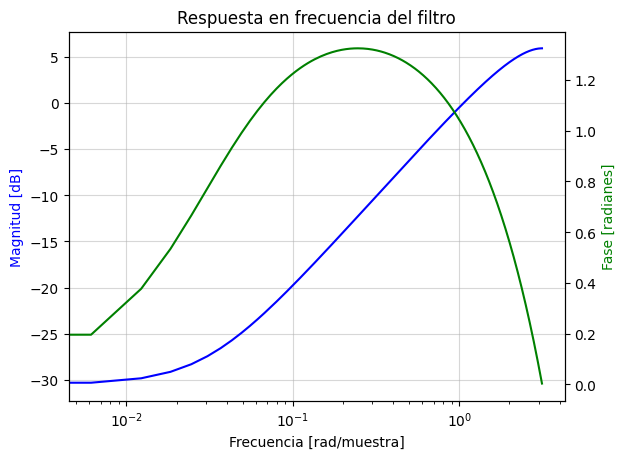

In [ ]:
# Define los coeficientes del filtro de preénfasis
alpha = 0.97
b = np.array([1, -alpha])
a = np.array([1])

# Plotear la respuesta en frecuencia del filtro de preénfasis
plot_freqz(b, a)

###Grabar audio en Colab

In [ ]:
from google.colab.output import eval_js
from base64 import b64decode
import io
import ffmpeg

AUDIO_HTML = """
<script>var my_div = document.createElement("DIV");
  var my_p = document.createElement("P");
  var my_btn = document.createElement("BUTTON");
  var t = document.createTextNode("Press to start recording");
  my_btn.appendChild(t);
  my_div.appendChild(my_btn);
  document.body.appendChild(my_div);
  var base64data = 0;
  var reader;
  var recorder, gumStream;
  var recordButton = my_btn;
  var handleSuccess = function(stream) {
    gumStream = stream;
    var options = {
      mimeType: 'audio/webm;codecs=opus'
    };
    recorder = new MediaRecorder(stream);
    recorder.ondataavailable = function(e) {
      var url = URL.createObjectURL(e.data);
      var preview = document.createElement('audio');
      preview.controls = true;
      preview.src = url;
      document.body.appendChild(preview);
      reader = new FileReader();
      reader.readAsDataURL(e.data);
      reader.onloadend = function() {
        base64data = reader.result;
      }
    };
    recorder.start();
  };
  recordButton.innerText = "Recording... press to stop";
  navigator.mediaDevices.getUserMedia({
    audio: true
  }).then(handleSuccess);

  function toggleRecording() {
    if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
    }
  }

  function sleep(ms) {
    return new Promise(resolve => setTimeout(resolve, ms));
  }
  var data = new Promise(resolve => {
    recordButton.onclick = () => {
      toggleRecording()
      sleep(1500).then(() => {
        resolve(base64data.toString())
        recordButton.innerText = "Success recording!"
      });
    }
  });</script>
"""

def record():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Divide el tamaño del fragmento en cuatro bytes, retenidos en b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Reemplazo los bytes 4:8 en proc.stdout con el tamaño real del fragmento RIFF.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = read(io.BytesIO(riff))

  return audio, sr

### Cargar audio de Drive a carpeta audio_samples Colab


In [ ]:
# 1. Choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser("/content/audio_samples")
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
file_list = drive.ListFile(
    {'q': "'1yEm8sWmi33bPZF9CqirGZdIM5RXf-H3i' in parents"}).GetList()

for f in file_list:
# 3. Create & download by id.
  if f['title'].endswith('.wav'):
    print('title: %s, id: %s' % (f['title'], f['id']))
    filepath = os.path.join(local_download_path, f['title'])
    print('downloading to {}'.format(filepath))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(filepath)

title: .wav, id: 1eSKvvg-4H6I1fTGj4Bqwq9KpoI020_sq
downloading to /content/audio_samples/.wav
title: .wav, id: 1BWt94PjATa_ssFDvORzaVp66R8R8skbP
downloading to /content/audio_samples/.wav
title: Marta A.wav, id: 18OBeuKW0Y_bJWAzdJag68wMXoHtaLciZ
downloading to /content/audio_samples/Marta A.wav
title: andrew.wav, id: 1RT1YinKovhcPkDZpPf_1ey995fPkWqjr
downloading to /content/audio_samples/andrew.wav
title: arun.wav, id: 1l6-VAezw47ZhDEXedEDd6_-hUO3Ew4-K
downloading to /content/audio_samples/arun.wav
title: mitha.wav, id: 1WKcGbEyAbYvE4f6S0qQW846lqSn5oYUU
downloading to /content/audio_samples/mitha.wav


### Funcion para cargar y escuchar audio en el notebook

In [ ]:
sr, andrew = read("/content/audio_samples/andrew.wav")
andrew = to_mono(andrew)
Audio(andrew, rate=sr)

In [ ]:
andrew_resample = resample(andrew, sr, 16000)
Audio(andrew_resample, rate=16000)

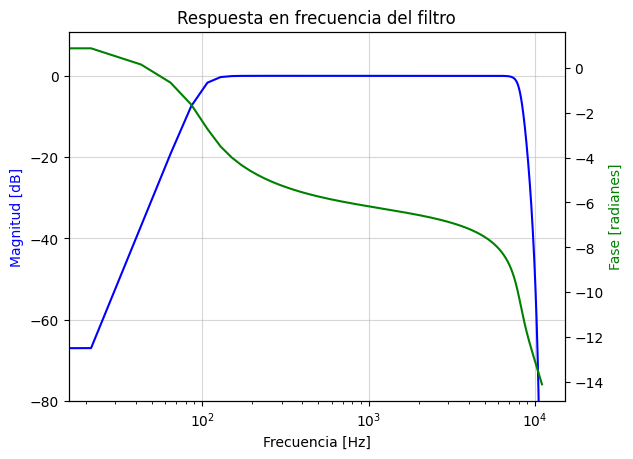

In [ ]:
antialias_b, antialias_a = BPF(100, 7999, sr) #Filtro antialias
plot_freqz(antialias_b, antialias_a, sr=sr)

In [ ]:
antialias_b, antialias_a

(array([0.22, 0.00, -1.11, 0.00, 2.22, 0.00, -2.22, 0.00, 1.11, 0.00,
        -0.22]),
 array([1.00, -2.69, 1.13, 1.61, 0.29, -1.93, -0.14, 0.73, 0.20, -0.13,
        -0.05]))

In [ ]:
x, y = sym.symbols("x y", positive=True)
z = sym.Symbol('z', complex=True)
n = antialias_b.size
m = antialias_a.size


In [ ]:
N = sym.Symbol('')
for i, bi in enumerate(antialias_b):
  N += bi*z**-(i)
N=sym.collect(N,z)
D = sym.Symbol('')
for i, ai in enumerate(antialias_a):
  D += ai*z**-(i)
D=sym.collect(D,z)
H=N/D
sym.N(H,2)

                           1.1   2.2   2.2   1.1   0.22                 
                  + 0.22 - ─── + ─── - ─── + ─── - ────                 
                             2     4     6     8    10                  
                            z     z     z     z    z                    
────────────────────────────────────────────────────────────────────────
         2.7   1.1   1.6   0.29   1.9   0.14   0.73   0.2   0.13   0.049
 + 1.0 - ─── + ─── + ─── + ──── - ─── - ──── + ──── + ─── - ──── - ─────
          z      2     3     4      5     6      7      8     9      10 
                z     z     z      z     z      z      z     z      z   

In [ ]:
andrew_antialias = signal.lfilter(antialias_b, antialias_a, andrew) #Filtro antialias
andrew_antialias = resample(andrew_antialias, sr, 16000)
Audio(andrew_antialias, rate=16000)

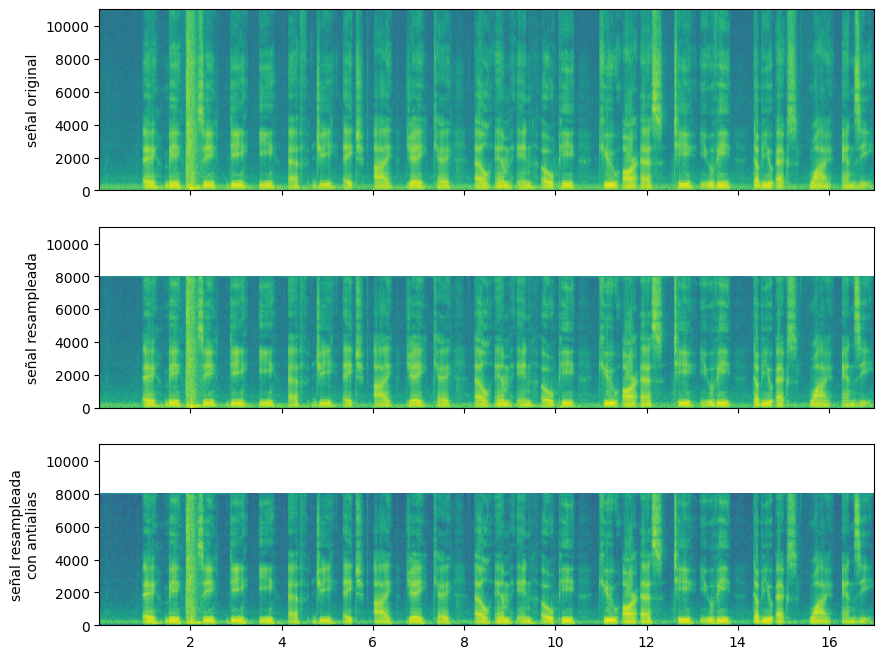

In [ ]:
fig, ax = plt.subplots(3,1, sharex=True, figsize=(10, 8))

ax[0].specgram(andrew, Fs=sr)
ax[0].set_ylabel('señal original')
#ax[0].set_ylim([0, 4000])

ax[1].specgram(andrew_resample, Fs=16000)
ax[1].set_ylabel('señal resampleada')
ax[1].set_ylim([0, 11025])

ax[2].specgram(andrew_antialias, Fs=16000)
ax[2].set_ylabel('señal resampleada\ncon antialias')
ax[2].set_ylim([0, 11025]);

In [ ]:
AUDIOPATH = "/content/audio_samples/"
vs_list = []
names_list = []
for filepath in sorted(glob.glob(os.path.join(AUDIOPATH, '*.wav'))):
  s, sr = load_audio(filepath, new_sr=16000)
  name = os.path.splitext(os.path.basename(filepath))[0]
  vs_list.append(VoiceSample(s, sr, name))
  names_list.append(name)
andrew = vs_list[1]
Audio(andrew.s,rate=andrew.sr)

### Funcion para plotear señales

In [ ]:
def plot_signal(s, sr, ax=None, plot_type=None, label=None):
  """
  Grafica una señal de audio en el tiempo.

  Parámetros:
  s (ndarray): Señal de audio.
  sr (int): Frecuencia de muestreo de la señal de audio.
  """
  N = len(s)
  duration = N / sr
  t = np.linspace(0, duration, num=N)
  if ax is None:
    fig, ax = plt.subplots()
  if plot_type == 'stem':
    ax.stem(t, s, linefmt='-', markerfmt='.', basefmt='k', label=label)
  elif plot_type == 'step':
    ax.step(t, s, where='post', label=label)
  else:
    ax.plot(t, s, label=label)
  ax.set_xlabel('Tiempo [s]'); ax.set_ylabel('Amplitud')
  if label is not None:
    ax.legend()
  ax.grid(True)
  return ax

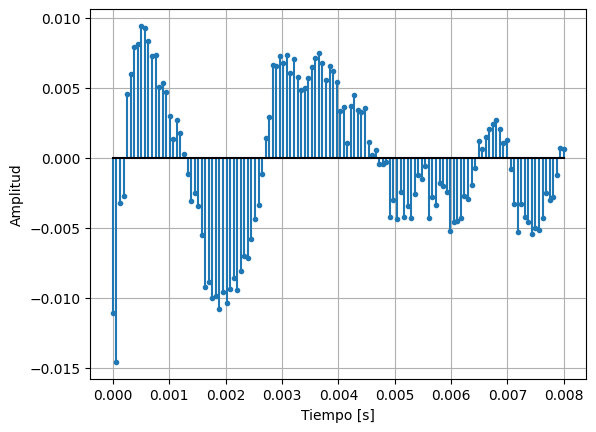

In [ ]:
plot_signal(andrew.s[:128], andrew.sr, plot_type='stem')
plt.show()

Ahora estas funciones del notebook "mfcc implementation and tutorial" por ILM

###Entramado del audio

Dado que el audio es un proceso no estacionario, la FFT producirá distorsiones. Para superar esto podemos asumir que el audio es un proceso estacionario durante cortos periodos de tiempo. Por ello, dividimos la señal en tramas cortas. Cada trama de audio tendrá el mismo tamaño que la FFT. También queremos que las tramas se solapen. Lo hacemos para que las tramas tengan cierta correlación entre ellos y porque perdemos la información en los bordes de cada fotograma después de aplicar una función ventana.

In [ ]:
def frame_signal(s, nfft=1024, hop_len=None, mode='constant'):
  """
  Divide una señal de audio en marcos solapados de tamaño nfft con un intervalo
  de saltos (hop length) de hop_len.

  Parámetros
  ----------
  s : array_like
      La señal de audio a dividir en marcos.
  nfft : int, optional
      El tamaño de los marcos. Por defecto es 1024.
  hop_len : int, optional
      El intervalo de saltos entre los marcos, en número de muestras.
      Por defecto es 512.

  Returns
  -------
  numpy.ndarray
      Una matriz 2D que contiene los marcos en el eje vertical y las muestras
      de cada marco en el eje horizontal.

  """

  # hop_len in number of samples
  hop_len = hop_len or nfft // 2
  s = np.pad(s, nfft // 2, mode=mode)
  num_frames = ceil((s.size - nfft) // hop_len) + 1
  frames = np.empty((num_frames, nfft))

  for n in range(num_frames):
      frames[n] = s[n * hop_len : (n * hop_len) + nfft]
  #dimensiones de frames: num_frames(filas) x nfft(columnas)
  return frames

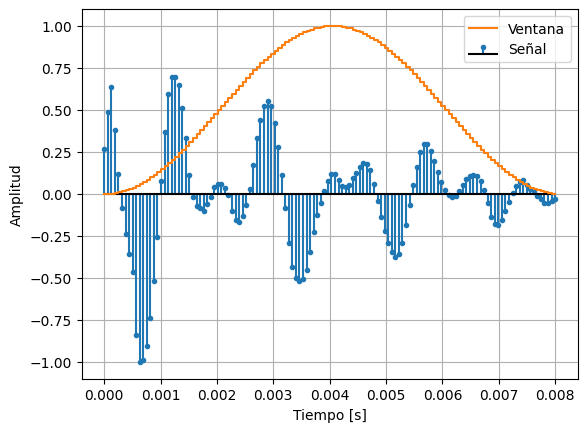

In [ ]:
#Esto es un ejemplo para visualizacion
frames = frame_signal(andrew.s, nfft=128)
window = signal.get_window("hann", 128, fftbins=True)

fig, ax = plt.subplots()
ax = plot_signal(normalize(frames[2911]), andrew.sr, ax=ax, plot_type='stem', label='Señal')
ax = plot_signal(window, andrew.sr, ax=ax, plot_type='step', label='Ventana')
plt.show()

In [ ]:
E = signals_energy_array(frames)
np.argmax(E)

2911

###Convertir al dominio de la frecuencia

Ahora convertiremos el audio, que actualmente está en el dominio del tiempo, al dominio de la frecuencia. La FFT asume que el audio es periódico y continúa. Al enmarcar la señal, nos aseguramos de que el audio sea periódico. Para hacer que el audio continúe, aplicamos una función ventana en cada trama. Si no lo hacemos, obtendremos distorsiones de alta frecuencia. Para superar esto, primero tenemos que aplicar una función de ventana al audio enmarcado y luego perforn FFT. La ventana asegura que ambos extremos de la señal terminen cerca de cero.

$$x_T[n]=x[n]w[n]$$
$$X_T[\omega]=\mathcal{F}\{x[n]\}*\mathcal{F}\{w[n]\}$$

La elección de la función de ventana tiene un impacto en la resolución espectral y en la capacidad de discriminación de señales cercanas en frecuencia. Idealmente, se busca una función de ventana que minimice el ancho del lóbulo principal y el decaimiento de los lóbulos secundarios.

In [ ]:
def plot_window_response(windows, ax1=None, ax2=None, labels=None):
    if type(windows) != list:
      windows = [windows]
    if ax1 is None or ax2 is None:
      fig, [ax1, ax2] = plt.subplots(2,1)
    for i, win in enumerate(windows):
      if labels is not None:
        label = labels[i]
      else:
        label = None
      # Graficar la ventana en el dominio del tiempo
      ax1.plot(win, label=label)
    ax1.set_title('Dominio del tiempo de la ventana')
    ax1.set_ylabel('Amplitud'); ax1.set_xlabel('Muestra')
    if labels is not None:
      ax1.legend()
    ax1.grid(True)

    # Calcular la respuesta en frecuencia de la ventana
    A = [0]*len(windows); response = [0]*len(windows)
    for i, win in enumerate(windows):
      A[i] = fft.fft(win, 2048) / (len(win)/2.0)
      response[i] = abs(fft.fftshift(A[i] / abs(A[i]).max()))
      response[i] = 20 * np.log10(np.maximum(response[i], 1e-10))
    freq = np.linspace(-0.5, 0.5, len(A[0]))
    # Graficar la respuesta en frecuencia de la ventana
    for i, win in enumerate(windows):
      if labels is not None:
        label = labels[i]
      else:
        label = None
      ax2.plot(freq, response[i], label=label)
    ax2.axis([-0.5, 0.5, -120, 0])
    ax2.set_title('Respuesta en frecuencia de la ventana')
    ax2.set_ylabel('Magnitud normalizada [dB]')
    ax2.set_xlabel('Frecuencia normalizada [ciclos por muestra]')
    if labels is not None:
      ax2.legend()
    ax2.grid()
    plt.show()
    return [ax1, ax2]

Veremos una comparativa entre las diferentes ventanas.

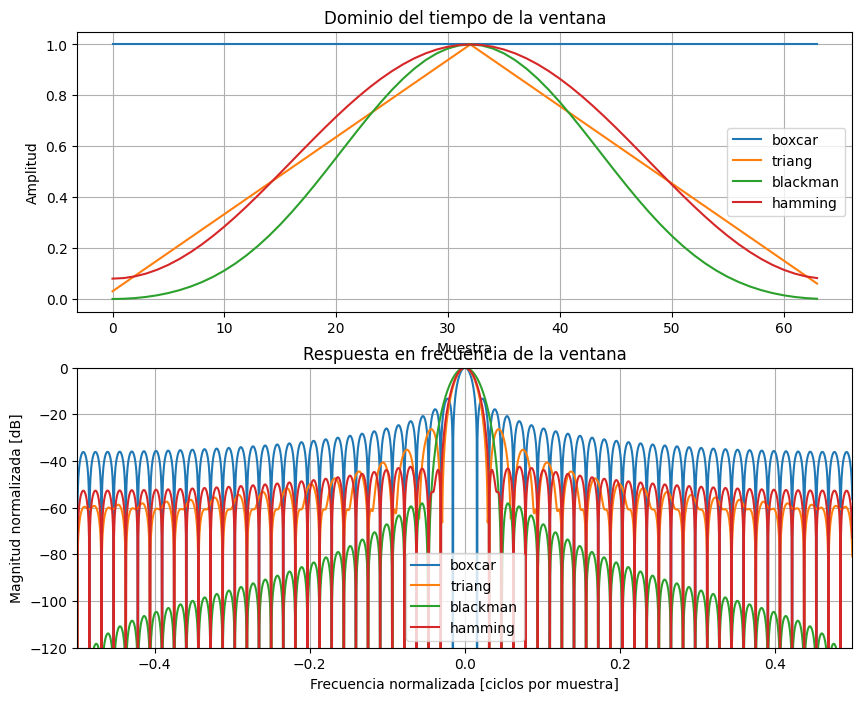

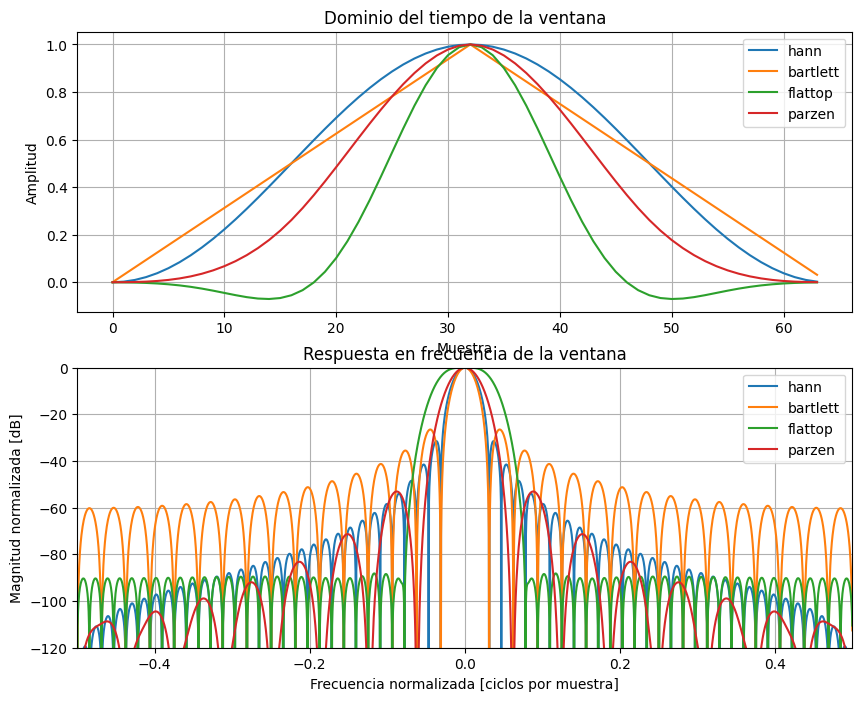

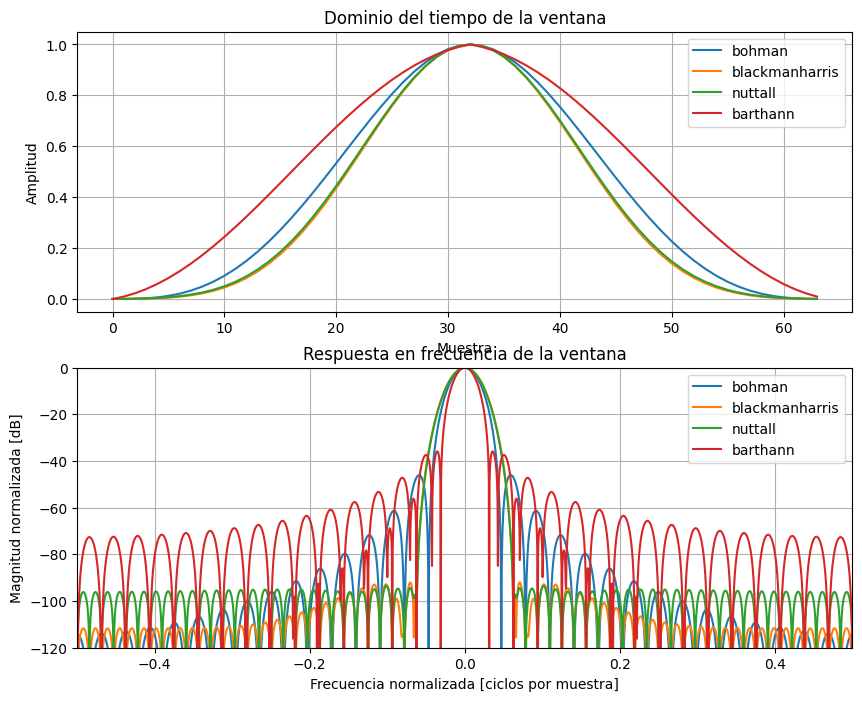

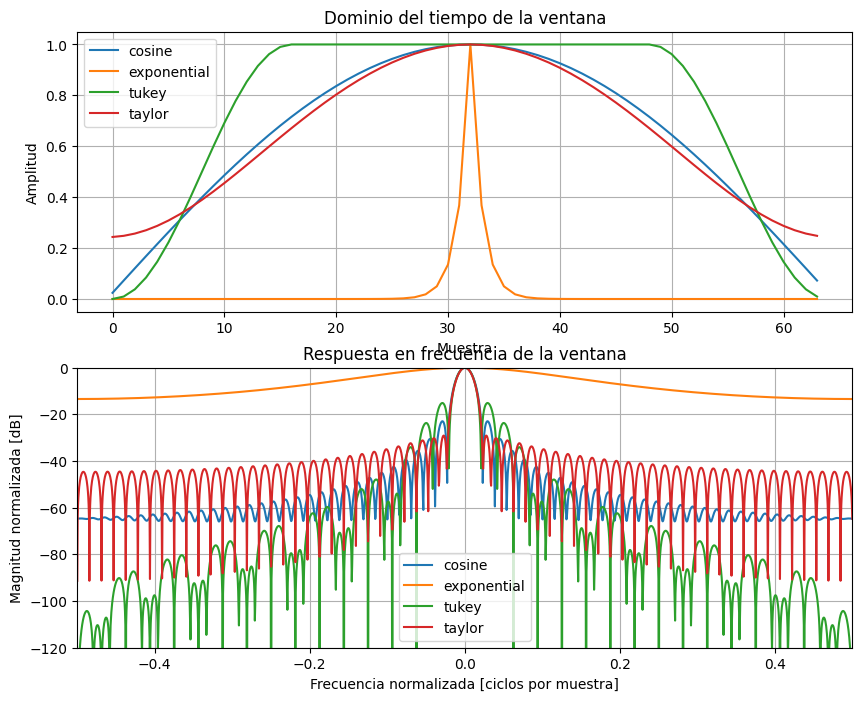

In [ ]:
# Ejemplo de uso: graficar la respuesta en frecuencia de la ventana Hann
windows_list = ['boxcar', 'triang', 'blackman', 'hamming', 'hann', 'bartlett',
               'flattop', 'parzen', 'bohman', 'blackmanharris', 'nuttall',
              'barthann', 'cosine', 'exponential', 'tukey', 'taylor', 'lanczos']
win_fn_list = [signal.get_window(window,64) for i, window in enumerate(windows_list)]

fig, [ax1, ax2] = plt.subplots(2,1,figsize=[10,8])
[ax1, ax2] = plot_window_response(win_fn_list[:4], ax1=ax1, ax2=ax2, labels=windows_list[:4])
fig, [ax1, ax2] = plt.subplots(2,1,figsize=[10,8])
[ax1, ax2] = plot_window_response(win_fn_list[4:8], ax1=ax1, ax2=ax2, labels=windows_list[4:8])
fig, [ax1, ax2] = plt.subplots(2,1,figsize=[10,8])
[ax1, ax2] = plot_window_response(win_fn_list[8:12], ax1=ax1, ax2=ax2, labels=windows_list[8:12])
fig, [ax1, ax2] = plt.subplots(2,1,figsize=[10,8])
[ax1, ax2] = plot_window_response(win_fn_list[12:-1], ax1=ax1, ax2=ax2, labels=windows_list[12:-1])

En esta comparativa podemos destacar 2 diferencias principales:
* **El ancho del lobulo principal**: El ancho del lobulo principal es clave para la resolucion espectral de dos sinusoides cercanas entre si en frecuencias. Esto es, cuanto mas angosto sea el lobulo principal, mejor resolucion de frecuencias cercanas tendra.
* **El decaimiento de los lobulos secundarios**: Esta caracteristica permite la discriminacion de una sinusoide de baja potencia respecto de otra. Un decaimiento rapido de lobulos secundarios resulta en una mejor deteccion de señal de baja potencia.

1.  **Ventana rectangular**: La ventana rectangular tiene un ancho
de lóbulo principal amplio y presenta lóbulos secundarios pronunciados. Aunque es fácil de implementar, no es la opción ideal en términos de resolución espectral.

2.  **Ventana de Hamming**: La ventana de Hamming ofrece un compromiso entre el ancho del lóbulo principal y el decaimiento de los lóbulos secundarios. Proporciona una buena atenuación de los lóbulos secundarios, pero aún tiene un ancho de lóbulo principal relativamente amplio.

3.  **Ventana de Blackman**: La ventana de Blackman ofrece un mejor decaimiento de los lóbulos secundarios que la ventana de Hamming, lo que resulta en una mejor discriminación de señales cercanas en frecuencia. Sin embargo, el ancho del lóbulo principal sigue siendo más amplio que en algunas otras ventanas más avanzadas.

Elegir la ventana correcta es difícil y lleva tiempo. Para simplificar, elegiremos la ventana de Hanning, que se define como:
$$ w_H(n) = 0.5 - 0.5 \cos\left(\frac{2\pi{n}}{M-1}\right)\qquad 0 \leq n \leq M-1$$

In [ ]:
def window_signal(s, nfft=1024, hop_len=None, window="hann"):
  """Aplica una ventana a cada frame de una señal de audio.

  Parámetros:
  s (array): La señal de audio a dividir en frames y aplicar la ventana.
  nfft (int): El tamaño de cada frame, debe ser potencia de 2.
  window (str o array): Tipo de ventana a aplicar. Si es una cadena, debe
      ser una de las opciones disponibles en scipy.signal.get_window.
      También se puede proporcionar un array que represente una ventana
      a medida.
  hop_len (int): La cantidad de muestras que se traslaparán entre dos frames
      consecutivos.

  Retorna:
  array: Un array de frames de la señal de audio con ventana aplicada.

  """
  s_framed = frame_signal(s, nfft=nfft, hop_len=hop_len)
  window = signal.get_window(window, nfft, fftbins=True)
  s_win = s_framed * window
  return s_win

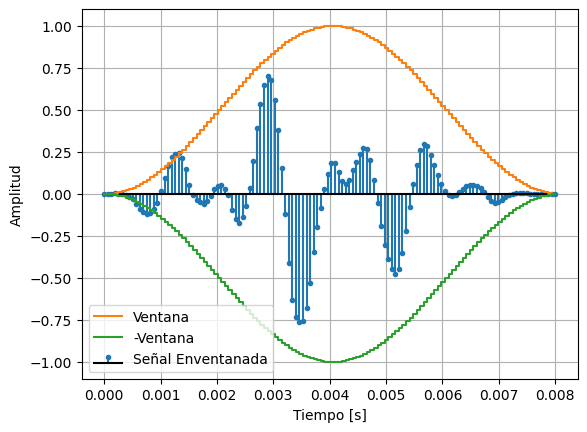

In [ ]:
andrew_window = window_signal(andrew.s, nfft=128)

fig, ax = plt.subplots()
ax = plot_signal(andrew_window[2911],andrew.sr, ax=ax, plot_type='stem', label='Señal Enventanada')
ax = plot_signal(window,andrew.sr, ax=ax, plot_type='step', label='Ventana')
ax = plot_signal(-window,andrew.sr, ax=ax, plot_type='step', label='-Ventana')
plt.show()

In [ ]:
andrew_window.shape

(4251, 128)

En el gráfico de arriba se puede ver que los dos extremos de la trama terminan en lugares diferentes del eje y. Puedes ver que la ventana acercó los bordes de cada trama a cero.

Ahora vamos a realizar la FFT. Después de hacer la FFT sólo tomamos la parte positiva del espectro (primera mitad +1).

## Transformada de Fourier


**Frecuencia de muestreo**: La frecuencia de muestreo se refiere a la cantidad de muestras tomadas por segundo al digitalizar una señal analógica. Se expresa en muestras por segundo o, más comúnmente, en hercios (Hz). La frecuencia de muestreo es crucial para asegurar la representación adecuada de una señal continua en el dominio digital.

El teorema de muestreo de Nyquist-Shannon establece que la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima contenida en la señal analógica para evitar la aparición de aliasing. Esto se conoce como la frecuencia de Nyquist. Si la señal de interés tiene una frecuencia máxima de Fmax, se recomienda una frecuencia de muestreo de al menos 2 * Fmax para obtener una representación precisa de la señal.

Si la frecuencia de muestreo es demasiado baja en relación con la frecuencia máxima de la señal, se producirá un fenómeno llamado aliasing, donde las frecuencias más altas se superponen y se confunden con frecuencias más bajas, generando distorsiones en la señal muestreada.

**Transformada de Fourier**: La transformada de Fourier es una herramienta matemática que permite descomponer una señal en sus componentes de frecuencia. En el contexto del procesamiento de señales digitales, la transformada de Fourier se aplica a una señal discreta para obtener su representación en el dominio de la frecuencia.

La transformada de Fourier discreta (DFT) es la versión discreta de la transformada de Fourier y se utiliza ampliamente en el procesamiento de señales digitales. La DFT toma una secuencia de muestras en el dominio del tiempo y la descompone en sus componentes espectrales correspondientes.

La DFT produce un espectro discreto de amplitudes y fases, donde cada componente espectral representa una frecuencia específica presente en la señal. La DFT es simétrica y devuelve información en ambos lados del espectro, conocido como espectro de dos caras. Sin embargo, en muchas aplicaciones, solo se considera el espectro de una cara, que muestra las frecuencias positivas.

En cuanto a las características de simetría de la transformada de Fourier, estas están relacionadas con la propiedad de la transformada conocida como simetría hermítica o conjugada. En el caso de la DFT, la transformada discreta de Fourier, hay dos tipos de simetría:

* Simetría hermítica: Si la señal en el dominio del tiempo es una secuencia real, es decir, no contiene componentes imaginarias, entonces el espectro resultante de la DFT es conjugadamente simétrico. Esto significa que los coeficientes en frecuencias negativas son el conjugado complejo de los coeficientes en frecuencias positivas. En otras palabras, el espectro tiene una simetría respecto al centro.

* Periodicidad de la DFT: la Transformada de Fourier Discreta (DFT) es periódica y se repite cada múltiplo de la frecuencia de muestreo. A medida que aumenta la frecuencia, la representación en el dominio de la frecuencia se repite periódicamente debido a la naturaleza discreta del análisis.
Esto está relacionado con la relación entre la frecuencia de muestreo y la frecuencia máxima de la señal.

Veamos cómo ocurre esto y cómo está relacionado con el aliasing.

Cuando se aplica la DFT a una secuencia de muestras en el dominio del tiempo, se obtiene un espectro discreto en el dominio de la frecuencia. La DFT considera que la secuencia de entrada es periódica, repitiéndose infinitamente en el tiempo. Esto implica que el espectro resultante también es periódico.

La longitud de la secuencia de entrada en la DFT determina la resolución en frecuencia. Si la secuencia tiene N muestras, el espectro resultante tendrá N componentes espectrales. La resolución en frecuencia, es decir, la distancia entre dos componentes espectrales adyacentes, está determinada por la frecuencia de muestreo (Fs) y la longitud de la secuencia (N). Se puede calcular como Fs/N.

Cuando la frecuencia de muestreo es baja en relación con las frecuencias presentes en la señal, ocurre el aliasing. El aliasing se produce cuando las componentes espectrales de la señal se superponen y confunden en el espectro resultante debido a una mala representación de las frecuencias.

En el caso de la DFT, el aliasing se manifiesta en forma de "desbordamiento" o "plegado" de las frecuencias. Si una frecuencia en la señal original excede la frecuencia de Nyquist (la mitad de la frecuencia de muestreo), se verá reflejada como una frecuencia más baja en el espectro, dentro del rango permitido. Esto se debe a que la DFT asume una periodicidad infinita y no puede distinguir entre frecuencias más altas que la frecuencia de Nyquist y sus réplicas.

Por ejemplo, si tienes una señal de frecuencia f que es mayor que la frecuencia de Nyquist (Fs/2), entonces su representación en la DFT se verá "plegada" hacia abajo en el espectro. La frecuencia f se reflejará como f' = Fs - f. Este fenómeno produce aliasing y distorsiona la representación espectral de la señal.

Para evitar el aliasing, es necesario aplicar un filtro anti-aliasing antes del proceso de muestreo, que limita las frecuencias presentes en la señal de entrada a un rango adecuado que esté dentro de las capacidades de la frecuencia de muestreo.

La relación entre la frecuencia de muestreo y la transformada de Fourier se basa en el teorema de muestreo de Nyquist-Shannon. Según este teorema, para evitar el aliasing y garantizar una representación precisa de la señal analógica, la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima contenida en la señal. Esto implica que la frecuencia de muestreo debe ser mayor que la frecuencia de Nyquist. Si se cumple esta condición, se puede realizar una reconstrucción adecuada de la señal original mediante la transformada de Fourier inversa.

### Rutina para plotear transformada de fourier

In [ ]:
def plot_fft(s, sr, ax=None, label=None, dtype=None):
  """
  Plot the FFT of an audio signal.

  Parameters
  ----------
  s : ndarray
      Audio signal.
  sr : int
      Sampling rate of the audio signal.
  """

  N =s.size
  if dtype == 'freq':
    S = s
    freq = np.linspace(0, sr // 2, N)
  elif dtype == 'time' or dtype == None:
    S = np.abs(np.fft.rfft(s))*2/N
    freq = np.fft.rfftfreq(N, d=1 / sr)
  else: return

  if ax is None:
    fig, ax = plt.subplots()

  ax.plot(freq, S, label=label)
  ax.set_xlabel('Frecuencia [Hz]');ax.set_ylabel('Magnitud')
  ax.set_title('Audio Signal FFT')
  if label is not None:
    ax.legend()
  ax.grid(True)
  return ax


### Principio de incertidumbre
El funcionamiento de un espectrograma permite obtener informacion en tiempo y en frecuencia, sacrificando resolucion en un eje para precisarlo sobre el otro. Es imposible tener total certeza sobre ambas magnitudes, más bien se busca un balance entre estas con un margen de error.
$$\Delta t = \frac{M}{f_s}$$
$$\Delta f = \frac{f_s}{M}$$
$$\Delta t \Delta f = \text{constante}$$

In [ ]:
def stft(s, nfft=1024, hop_len=None, window='hann'):
  """Calcula la Transformada de Fourier de Tiempo Corto (STFT) de la señal de audio s.

  Parámetros:
      s (ndarray): Señal de audio a analizar.
      nfft (int, optional): Tamaño de la ventana para la STFT. Por defecto 1024.
      hop_len (int, optional): Longitud del salto entre tramas. Si no se especifica, se utiliza nfft // 2.
      window (str, optional): Tipo de ventana a utilizar. Por defecto, se utiliza la ventana de Hann.

  Retorna:
      ndarray: Matriz de tamaño (T, F) que contiene los coeficientes de la STFT de la señal de audio,
      donde T es el número de tramas y F es el número de frecuencias.

  """
  hop_len = hop_len or nfft // 2
  s_win = window_signal(s, nfft=nfft, hop_len=hop_len, window=window)
  n_frames = s_win.shape[0]
  S_fft = np.empty((n_frames, 1 + nfft // 2), dtype=np.complex64, order='F')

  for n in range(n_frames):
    N = S_fft.shape[1]
    frame = s_win[n, :]
    S_fft[n, :] = np.fft.rfft(frame, n=nfft, axis=-1)[:N]*2/N

  return np.abs(S_fft, dtype=np.float32)


def powspec(Spect, nfft=1024):
  return Spect ** 2 / nfft


def logpowspec(Spect, nfft=1024, norm=True):
  ps = powspec(Spect, nfft=nfft)
  lps = power_to_db(ps)
  if norm:
    return lps - np.max(lps)
  else:
    return lps

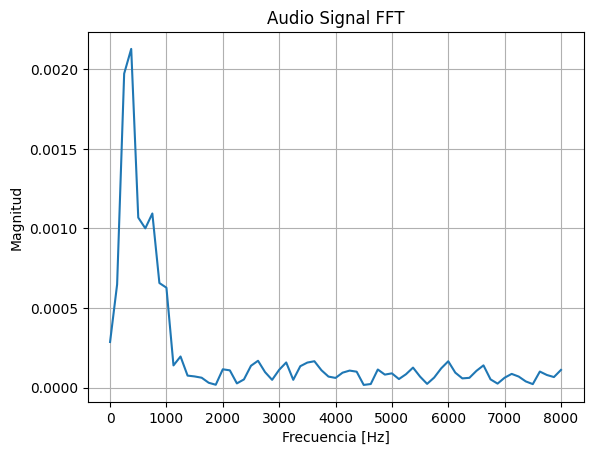

In [ ]:
plot_fft(andrew_window[361], andrew.sr)
andrew_S=stft(andrew.s)

In [ ]:
np.argmax(signals_energy_array(andrew_S))

361

<Axes: title={'center': 'Audio Signal FFT'}, xlabel='Frecuencia [Hz]', ylabel='Magnitud'>

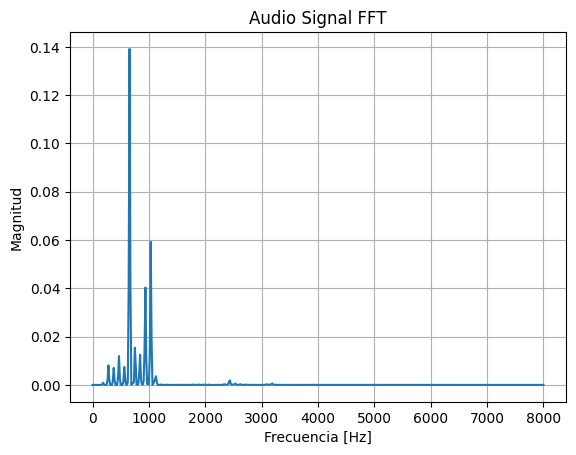

In [ ]:
andrew_pow_S = signal_to_power(andrew_S)
plot_fft(andrew_pow_S[361], andrew.sr, dtype='freq')

### Prueba de cumplimiento de indentidad de Parseval en la funcion de transformada de Fourier

In [ ]:
form={#Diccionario de frecuencias de formantes vocales
    'a':[(700, 60), (1500, 200), (2400, 100)],#'vocal':[(F1, sd1), (F2, sd2), (F3, sd3)]
    'e':[(540, 60), (1850, 50), (2540, 140)],#'vocal' es la clave de entrada y hace referencia a la vocal a formar
    'i':[(290, 30), (2200, 180), (2650, 200)],#FN es la frecuencia del formante primero, segundo o tercero
    'o':[(500, 20), (1000, 250), (2280, 100)],#sdN es el desvio que tiene y se usa como ancho de banda para el formante
    'u':[(330, 30), (930, 350), (2300, 100)],#para llamar: form['vocal'][N][F(0) o sd(1)]
}

In [ ]:
fs = 8000
t = np.linspace(0, 1, fs)

# la onda diente de sierra es mas rica en armonicos que otras formas de onda
saw = signal.sawtooth(2*np.pi*220*t,width=.8)
e=[]# esta es una lista donde almacenamos las tres formantes y luego lo sumamos
for i, formant in enumerate(form['e']):
  fc = form['e'][i][0]
  # Q es el factor de calidad es igual a fc/bw fc: frecuencia central, bw: ancho de banda
  Q = fc / form['e'][i][1]
  b, a = signal.iirpeak(fc, Q, fs)
  e.append(signal.lfilter(b, a, saw))
e=np.mean(e, axis=0)# en realidad lo promediamos para mantener la amplitud
e /= np.max(np.abs(e)) #deberia sonar como la vocal 'e'

In [ ]:
Audio(e, rate=8000)

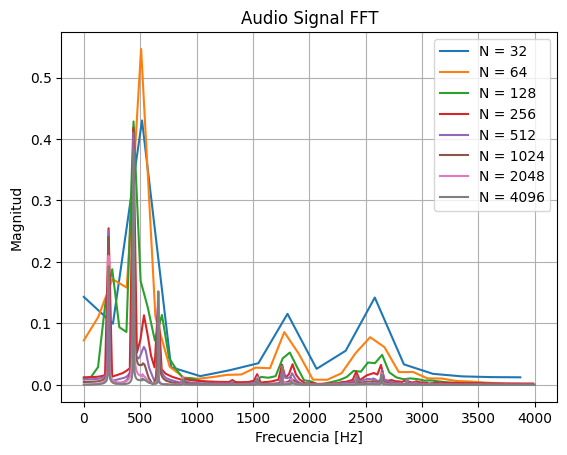

In [ ]:
e32 = e[:31]
e64 = e[:63]
e128 = e[:127]
e256 = e[:255]
e512 = e[:511]
e1024 = e[:1023]
e2048 = e[:2047]
e4096 = e[:4095]
fig, ax = plt.subplots()
ax = plot_fft(e32, 8000, ax=ax, label='N = 32')
ax = plot_fft(e64, 8000, ax=ax, label='N = 64')
ax = plot_fft(e128, 8000, ax=ax, label='N = 128')
ax = plot_fft(e256, 8000, ax=ax, label='N = 256')
ax = plot_fft(e512, 8000, ax=ax, label='N = 512')
ax = plot_fft(e1024, 8000, ax=ax, label='N = 1024')
ax = plot_fft(e2048, 8000, ax=ax, label='N = 2048')
ax = plot_fft(e4096, 8000, ax=ax, label='N = 4096')
plt.show()

### Calcular la potencia del espectro

In [ ]:
def plotspectgram(s, sr, nfft=1024):
  S = logpowspec(s, nfft=nfft)
  f = np.linspace(0, sr / 2, S.shape[0])
  t = np.linspace(0, (S.shape[1] * nfft) / (2. * sr), S.shape[1])
  plt.pcolormesh(t, f, S, shading='auto')
  plt.ylabel('Frequencia [Hz]'); plt.xlabel('Tiempo [s]')
  plt.colorbar()
  plt.show()

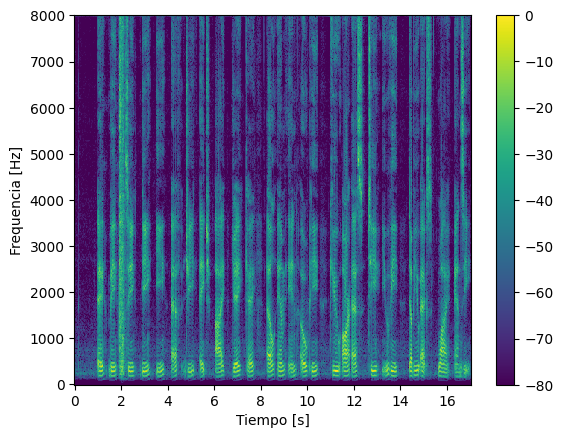

In [ ]:
plotspectgram(andrew_S.T, andrew.sr)

### Banco de filtros espaciados
Aquí calculamos el banco de filtros Mel-espaciados y luego pasamos el audio enmarcado a través de ellos. Esto nos dará información sobre la potencia en cada banda de frecuencia. Los filtros se pueden construir para cualquier banda de frecuencia, pero para nuestro ejemplo nos fijaremos en toda la banda muestreada.

Lo interesante del banco de filtros espaciado Mel es el espaciado entre los filtros, que crece exponencialmente con la frecuencia. El banco de filtros se puede hacer para cualquier banda de frecuencias. Aquí calcularemos el banco de filtros para toda la banda de frecuencias.

### Cálculo de puntos del filtro

Primero construimos los puntos de filtrado que determinan el inicio y el fin de los filtros. Para ello, primero convertimos los dos bordes del banco de filtros al espacio Mel. Después construimos una matriz lineal entre las dos frecuencias Mel. A continuación, convertimos la matriz al espacio de frecuencias y, por último, normalizamos la matriz al tamaño FFT y elegimos los valores FFT asociados.


In [ ]:
def get_filter_points(nfilt=13, nfft=1024, sr=8000, fmin=300, fmax=None):
    """
    Calcula los puntos de filtro en una escala Mel, dados los límites inferior y superior de frecuencia,
    el número de filtros, el tamaño de la FFT y la frecuencia de muestreo.

    Args:
    fmin (float, optional): Frecuencia mínima en Hz. Valor por defecto es 20.
    fmax (float, optional): Frecuencia máxima en Hz. Valor por defecto es 22050.
    nfilt (int, optional): Número de filtros a crear. Valor por defecto es 13.
    nfft (int, optional): Tamaño de la transformada rápida de Fourier (FFT). Valor por defecto es 1024.
    sr (int, optional): Frecuencia de muestreo en Hz. Valor por defecto es 44100.

    Returns:
    numpy.ndarray, numpy.ndarray: Un arreglo con los puntos de filtro y un arreglo con las frecuencias en Hz.

    """
    fmax = fmax or sr/2
    assert fmax <= sr/2, "fmax is greater than samplerate/2"
    # compute points evenly spaced in mels
    fmin_mel = freq_to_mel(fmin)
    fmax_mel = freq_to_mel(fmax)
    mels = np.linspace(fmin_mel, fmax_mel, num=nfilt+2)
    freqs = mel_to_freq(mels)

    return np.floor((nfft + 1) * freqs / sr ).astype(int)[:], freqs

In [ ]:
filter_points, hz_freqs = get_filter_points()
filter_points, hz_freqs

(array([ 38,  53,  70,  88, 109, 132, 159, 188, 220, 256, 297, 342, 393,
        449, 512]),
 array([300.00, 416.88, 547.42, 693.22, 856.07, 1037.94, 1241.07, 1467.95,
        1721.34, 2004.35, 2320.44, 2673.47, 3067.77, 3508.15, 4000.00]))

### Construir el banco de filtros

Después de tener los puntos de filtrado, construimos los filtros.

A continuación dividimos los pesos triangulares Mel por la anchura de la banda Mel (normalización del área). Si no normalizamos los filtros, veremos que el ruido aumenta con la frecuencia debido a la anchura del filtro.

In [ ]:
def mel_fbank(filter_points, hz_freqs, nfft=1024, norm=True):
    """
    Calcula los filtros de Mel.

    Parameters
    ----------
    filter_points : numpy.ndarray
        Array de enteros que indica los índices de frecuencia para cada filtro.
    nfft : int, optional
        Tamaño de la transformada de Fourier de corto tiempo (STFT), por defecto 1024.

    Returna
    -------
    numpy.ndarray
        Matriz de forma (num_filtros, nfft/2+1) que representa los filtros de Mel.
    """

    filters = np.zeros((len(filter_points) - 2, nfft // 2 + 1))

    for n in range(len(filter_points)-2):
        filters[n, filter_points[n] : filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
        filters[n, filter_points[n + 1] : filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[n + 1])
    if norm:
      enorm = 2.0 / (hz_freqs[2:filters.shape[0]+2] - hz_freqs[:filters.shape[0]])#energy normal
      filters *= enorm[:, np.newaxis]
    return filters

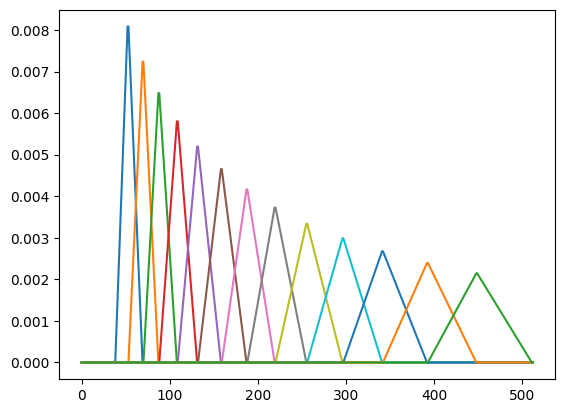

In [ ]:
filters = mel_fbank(filter_points, hz_freqs)
for n in range(filters.shape[0]):
    plt.plot(np.arange(len(filters[n])),filters[n])
plt.show()

### Filtrar la señal

In [ ]:
andrew_S_filtered = np.dot(filters, np.transpose(andrew_pow_S))
andrew_coeffs = power_to_db(andrew_S_filtered)
andrew_coeffs

array([[-77.76, -76.16, -77.46, ..., -71.79, -73.56, -77.86],
       [-81.12, -83.03, -81.90, ..., -76.11, -77.92, -83.40],
       [-82.91, -86.29, -83.26, ..., -83.53, -84.92, -88.78],
       ...,
       [-93.60, -95.56, -95.35, ..., -83.61, -93.55, -96.97],
       [-94.97, -95.90, -95.83, ..., -80.21, -92.36, -97.83],
       [-94.28, -94.70, -98.27, ..., -78.51, -89.26, -96.70]])

Ahora tenemos una matriz que representa la potencia de audio en los 13 filtros en diferentes tramas temporales.
### Generar los coeficientes cepstrales
El último paso para generar el MFCC es utilizar la Transformada Discreta del Coseno (DCT). La DCT de tipo 2 asume que la señal de entrada es real y uniforme, como es el caso de la mayoría de las señales de audio. Produce una salida de valor real y se utiliza habitualmente para la extracción de características en aplicaciones de procesamiento del habla y análisis de audio. Por lo tanto, en la mayoría de los casos, para la identificación de locutores y la extracción de características de voz mediante MFCC, la DCT de tipo 2 es la opción adecuada.
### Tipo I
$$y_k = x_0 + (-1)^k x_{N-1} + 2 \sum_{n=1}^{N-2} x_n \cos\left(\frac{\pi k n}{N-1} \right)$$
### Tipo II
$$y_k = 2 \sum_{n=0}^{N-1} x_n \cos\left(\frac{\pi k(2n+1)}{2N} \right)$$
### Tipo III
$$y_k = x_0 + 2 \sum_{n=1}^{N-1} x_n \cos\left(\frac{\pi(2k+1)n}{2N}\right)$$

In [ ]:
mfccs = fft.dct(andrew_coeffs, type=3, axis=0, norm='ortho')

In [ ]:
def mfcc (s, sr,	hop_len=None,	numcep=13,	nfilt=40,	nfft=1024, fmin=300, fmax=None,	lifter=0,	winfunc='hann'):
  S_stft = stft(s, nfft=nfft, hop_len=hop_len, window=winfunc)
  pow_S = powspec(S_stft, nfft=nfft)
  fmax = fmax or sr // 2
  filter_points, mel_freqs = get_filter_points(nfilt=nfilt, nfft=nfft, sr=sr, fmin=fmin, fmax=fmax)
  filters = mel_fbank(filter_points, mel_freqs)
  pow_S_filtered = np.dot(filters, np.transpose(pow_S))
  coeffs = power_to_db(pow_S_filtered)
  mfccs = fft.dct(coeffs, type=2, axis=0, norm='ortho')[:numcep]
  return mfccs


def get_features(vs):
    """
    Extrae características MFCC de una muestra de audio de voz.

    Parámetros:
    vs (VoiceSample): La muestra de audio de voz de la que se extraerán las
    características.

    Retorna:
    ndarray: Un array de numpy con las características MFCC de la muestra de
    audio.
    """
    s, sr = vs.s, vs.sr
    s = trim_silence(s, sr)
    Audio(s, rate=sr)
    mfccs = mfcc(s, sr)
    mfcc_delta = delta(mfccs)
    mfcc_delta2 = delta(mfccs, order=2)
    feats = np.concatenate((mfccs, mfcc_delta, mfcc_delta2))
    return feats

In [ ]:
    mfcc_delta = delta(mfccs)
    mfcc_delta2 = delta(mfccs, order=2)
    feats = np.concatenate([mfccs, mfcc_delta, mfcc_delta2], axis=0)

In [ ]:
Audio(vs_list[0].s,rate=vs_list[0].sr)

In [ ]:
vs_list[0].s

array([0.01, -0.00, 0.00, ..., 0.00, -0.00, 0.00])

In [ ]:
feat=get_features(vs_list[0])
np.shape(feat)

(39, 369)

### Revisión de coeficientes Cepstrales

In [ ]:
mfccs[:, 0]

array([-289.68, 105.01, -63.74, 36.48, -34.85, 18.38, -25.30, 8.57,
       -16.64, 1.77, -11.38, -2.61, -6.38])

In [ ]:
def spec_show(Sxx, ax=None):
  if ax is None:
    fig, ax = plt.subplots()
  ax.imshow(Sxx, aspect='auto', cmap='coolwarm', origin='lower')
  ax.set_ylabel('Frequencia [Mel]')
  ax.set_xlabel('Tiempo [tramas]')
  return ax

<Axes: xlabel='Tiempo [tramas]', ylabel='Frequencia [Mel]'>

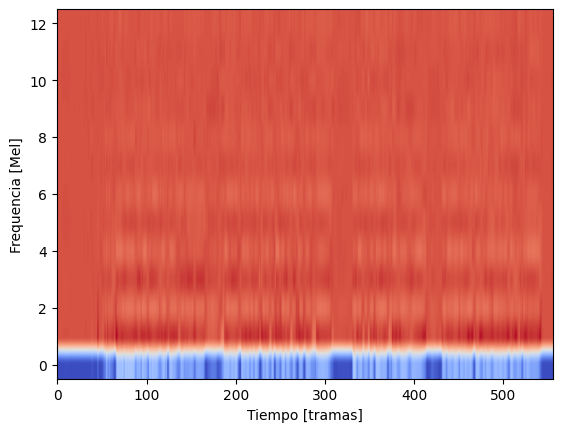

In [ ]:
spec_show(mfcc(vs_list[0].s,vs_list[0].sr))

<Axes: xlabel='Tiempo [tramas]', ylabel='Frequencia [Mel]'>

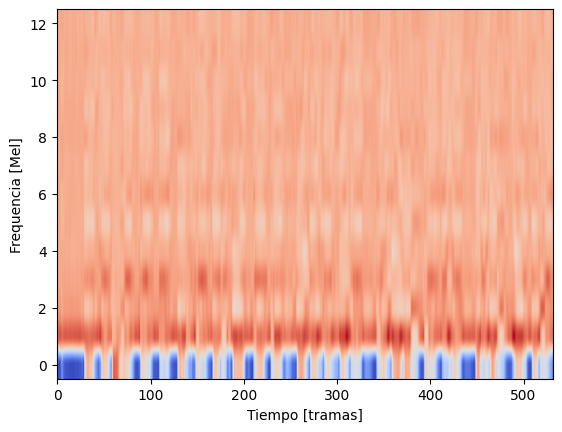

In [ ]:
import librosa
import librosa.display
andrew_mfcc = librosa.feature.mfcc(y=(andrew.s*1.0),sr=sr,n_mfcc=13, center=True, pad_mode='reflect')
spec_show(andrew_mfcc)

## Modelo de mezcla gaussiana
El núcleo de la decisión de verificación del hablante es la relación de probabilidad. Digamos que queremos determinar si la muestra de voz Y (del conjunto de verificación) fue hablada por S.

Entonces, la tarea de verificación es una prueba de hipótesis básica:

$H_{0}$: Y es el hablante S, $H_{1}$: Y __NO__ es el hablante S.

La prueba para decidir si aceptar $H_{0}$ o no es la razón de verosimilitud (LR):

$$LR = \frac{p(Y \mid H_0)}{p(Y \mid H_1)}$$

Si la razón de probabilidad es mayor que el umbral $\theta$, aceptamos $H_{0}$, de lo contrario aceptamos $H_{1}$.

Si hablamos en términos de logaritmos, entonces la razón de verosimilitud logarítmica es simplemente la diferencia entre los logaritmos de las 2 funciones de densidad de probabilidad:

$$\log(LR) = \log(p(Y \mid H_0)) - \log(p(Y \mid H_1))$$

Tenemos un hablante para probar $H_{0}$, y podemos construir un modelo, digamos $\lambda_{hyp}$, siendo por ejemplo una Distribución Gaussiana de las características extraídas.

Sin embargo, no tenemos un modelo alternativo para $H_{1}$. Debemos calcular lo que se llama un “Modelo de Fondo”, que sería un Modelo Gaussiano $\lambda_{\overline{hyp}}$.

Hay 2 opciones para el modelo de fondo:

* Considere el conjunto cerrado de otros hablantes y
calcule:
$p(X \mid \lambda_{\overline{hyp}}) = f ( p(X \mid \lambda_1), ..., p(X \mid \lambda_N))$
, dónde ***f*** es una función agregativa como la media o el máximo. Sin embargo, requiere un modelo por hipótesis alternativa, es decir, por hablante.
o considere un grupo de varios oradores diferentes para entrenar un solo modelo, llamado Modelo de fondo universal (UBM)
* o considere un grupo de varios oradores diferentes para entrenar un solo modelo, llamado Modelo de fondo universal (UBM)

La principal ventaja del UBM es que es universal en el sentido de que puede ser utilizado por cualquiera de los hablantes, sin tener que volver a entrenar un modelo.

## Modelo universal de fondo
Un UBM es un modelo de mezcla gaussiana de alto orden (generalmente de 512 a 2048 mezclas con 24 dimensionesa) entrenado en una gran cantidad de habla, de una amplia población. Este paso se usa para aprender la distribución de características independiente del hablante, que se usa en la hipótesis alternativa en la razón de verosimilitud.

Para un vector de características D-dimensional $x$, la densidad de la mezcla es:

$$P(x \mid \lambda) = \sum_{k=1}^M w_k \times g(x \mid \mu_k, \Sigma_k)$$

Dónde:

* $x$ es un vector de características D-dimensional
* $w_k, k = 1, 2, ..., M$ es la mezcla pesos st suman 1
* $\mu_k, k = 1, 2, ..., M$ es la media de cada gaussiana
* $\Sigma_k, k = 1, 2, ..., M$ es la covarianza de cada gaussiana
* $g(x \mid \mu_k, \Sigma_k)$ son las densidades gaussianas tales que:
$$g(x \mid \mu_k, \Sigma_k) = \frac{1}{(2 \pi)^{\frac{D}{2}} {\mid \Sigma_k \mid}^{\frac{1}{2}}} exp^{ - \frac{1}{2}(x - \mu_k)^T \Sigma_k^{-1} (x-\mu_k)}$$

Los parámetros del GMM son por lo tanto:$\lambda = (w_k, \mu_k, \Sigma_k), k = 1, 2, 3, ..., M$

Por lo general, usamos una matriz de covarianza diagonal en lugar de una de covarianza completa, ya que es más eficiente desde el punto de vista computacional y empíricamente funciona mejor.

El GMM se entrena en una colección de vectores de entrenamiento. Los parámetros del GMM se calculan iterativamente utilizando el algoritmo Expectation-Maximization (EM) y, por lo tanto, no hay garantías de que se convierta dos veces en la misma solución dependiendo de la inicialización.

Bajo el supuesto de vectores de características independientes, la probabilidad logarítmica de un modelo
$\lambda$
para una secuencia
$X = (x_1, x_2, ..., x_T)$
es simplemente el promedio de todos los vectores de características:

$$\log p(X \mid \lambda) = \frac{1}{T} \sum_t \log p(x_t \mid \lambda)$$

##Inscripcion de oradores

El último paso antes de la verificación es realizar el alta del altavoz. El objetivo sigue siendo entrenar también un modelo de mezcla gaussiana en las características extraídas para cada altavoz, lo que da como resultado 20 modelos si tenemos 20 hablantes.

Hay 2 enfoques para modelar los hablantes:

* entrenar un GMM de menor dimensión (64 a 256 mezclas) dependiendo de la cantidad de datos de inscripción que tengamos
* adaptar el UBM GMM al modelo de hablante utilizando la Adaptación Máxima a Posterior (MAP), generalmente el enfoque seleccionado

En MAP, simplemente iniciamos el algoritmo EM con los parámetros aprendidos por el UBM. Mediante este paso, solo adaptamos la media, y no la covarianza, ya que actualizar la covarianza no mejora el rendimiento.

Para que la media se actualice, realizamos una adaptación máxima a posteriori:

$$\mu_k^{MAP} = \alpha_k \mu_k + (1 - \alpha_k) \mu_k^{UBM}$$

Dónde :

* $\alpha_k = \frac{n_k}{n_k + \tau_k}$
es el coeficiente de adaptación medio
* $n_k$
es el recuento de los datos de adaptación
* $\tau_k$
es el factor de relevancia, entre 8 y 32

## Verificacion del orador
Para una muestra en la carpeta de prueba, calculamos la puntuación de la GMM de identidad reclamada en el conjunto de inscripción. Restamos la puntuación del GMM de la UBM para cada uno y obtenemos la razón de verosimilitud. Luego comparamos el puntaje con nuestro umbral (generalmente 0) y aceptamos o rechazamos la identidad del hablante.

### Funciones de entrenamiento para el modelo de mezcla gaussiana

In [ ]:
def fit(frames, test_ratio=0.05, n_components=16):
    """
    Entrena un modelo de mezcla de gaussianas (GMM) con un conjunto de frames.

    Parámetros:
    frames (ndarray): Un array de numpy con los frames de audio para entrenar el
    modelo.
    test_ratio (float, opcional): El porcentaje de frames que se usará como
    conjunto de prueba. Valor por defecto: 0.05.
    n_components (int, opcional): El número de componentes de la GMM. Valor por
    defecto: 16.

    Retorna:
    tuple: Una tupla con dos elementos:
    gmm (sklearn.mixture.GaussianMixture): El modelo de GMM entrenado.
    test_idx (ndarray): Un array de numpy con los frames de audio usados como
    conjunto de prueba.
    """
    index = np.arange(len(frames))
    np.random.shuffle(index)

    train_idx = index[int(len(index) * test_ratio):]
    test_idx = index[:int(len(index) * test_ratio)]

    gmm = GMM(n_components=n_components, covariance_type='diag', n_init=3, max_iter=100, random_state=0)
    gmm.fit(frames[train_idx])

    return gmm, frames[test_idx]


def predict(gmms, test_frame):
    """
    Hace una predicción sobre a qué clase pertenece un frame de audio basándose en un conjunto de modelos de GMM.

    Parámetros:
    gmms (dict): Un diccionario con los nombres y modelos de GMM para hacer
    predicciones.
    test_frame (ndarray): El frame de audio para el que se quiere hacer la
    predicción.

    Retorna:
    list: Una lista de tuplas con los nombres de las clases y las puntuaciones
    de predicción de cada clase. La lista está ordenada en orden descendente de
    puntuación.
    """
    scores = []
    for gmm_name, gmm in gmms.items():
        scores.append((gmm_name, gmm.score(test_frame)))
    return sorted(scores, key=lambda x: x[1], reverse=True)


def evaluate(gmms, test_frames, printeo=False):
    """
    Evalúa la precisión de un conjunto de modelos de GMM al hacer predicciones sobre un conjunto de frames de audio de prueba.

    Parámetros:
    gmms (dict): Un diccionario con los nombres y modelos de GMM para hacer
    predicciones.
    test_frames (dict): Un diccionario con los nombres y frames de audio de
    prueba.
    """
    correct = 0

    for name in test_frames:
        best_name, best_score = predict(gmms, test_frames[name])[0]
        if printeo == True: print('Verdad Base: %s, Prediccion: %s, Puntuacion: %f' %
              (name, best_name, best_score))
        if name == best_name:
            correct += 1

    print('Precision Global: %.0f%%' % (float(correct) / len(test_frames) * 100.0))

In [ ]:
# Paso 1: Preparación de los datos

mfcc_list = []
names_list = []

for filename in sorted(glob.glob(os.path.join(AUDIOPATH, '*.wav'))):
    y, sr = librosa.load(filename)
    mfccs = mfcc(y, sr)
    name = os.path.splitext(os.path.basename(filename))[0]
    mfcc_list.append(mfccs)
    names_list.append(name)

data = dict(zip(names_list, mfcc_list)) # Diccionario con los coeficientes MFCC para cada locutor
features_train = np.hstack(list(data.values())).T # Apilar los coeficientes MFCC en una matriz
speaker_names = list(data.keys()) # Lista con los nombres de los locutores

# Paso 2: Entrenamiento del modelo UBM
ubm = GMM(n_components=64, covariance_type='diag', n_init=3, max_iter=100, random_state=0)
ubm.fit(features_train)

# Paso 3: Entrenamiento de modelos GMM específicos para cada locutor
speaker_models = {}
for speaker in speaker_names:
    speaker_data = data[speaker]
    speaker_model = GMM(n_components=8, covariance_type='diag', n_init=3, max_iter=100, random_state=0)
    speaker_model.fit(speaker_data)
    speaker_models[speaker] = speaker_model

In [ ]:
features = np.hstack(list(data.values())).T  # Apilar los coeficientes MFCC en una matriz
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": [4, 8, 16, 32, 64],
    "covariance_type": ["tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GMM(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(features)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['tied', 'diag', 'full'],
                         'n_components': [4, 8, 16, 32, 64]},
             scoring=<function gmm_bic_score at 0x7dedb0afcb80>)

In [ ]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

Number of components Type of covariance     BIC score
6                     8               diag  58706.822067
5                     4               diag  58855.892022
7                    16               diag  59482.035231
10                    4               full  60099.251306
0                     4               tied  60657.205139

In [ ]:
# Grid de hiperparámetros para el modelo UBM
ubm_params = {
    'n_components': [32, 64, 128],
    'covariance_type': ['diag', 'full'],
}

# Búsqueda de hiperparámetros óptimos para el modelo UBM
ubm_gridsearch = GridSearchCV(GMM(), ubm_params, scoring=gmm_bic_score, cv=5, verbose=2)
ubm_gridsearch.fit(features)

# Obtener los mejores hiperparámetros y puntajes
best_ubm_params = ubm_gridsearch.best_params_
best_ubm_score = -ubm_gridsearch.best_score_

print("Mejores hiperparámetros para el modelo UBM:", best_ubm_params)
print("Puntaje del modelo UBM: {:.2f}".format(best_ubm_score))

ubm_cv_scores = cross_val_score(ubm, features, cv=5, verbose=2)  # Validación cruzada con 5 folds
ubm_accuracy = np.mean(ubm_cv_scores)
print("Precisión promedio del modelo UBM: {:.2f}".format(ubm_accuracy))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............covariance_type=diag, n_components=32; total time=   0.2s
[CV] END ..............covariance_type=diag, n_components=32; total time=   0.4s
[CV] END ..............covariance_type=diag, n_components=32; total time=   0.4s
[CV] END ..............covariance_type=diag, n_components=32; total time=   0.4s
[CV] END ..............covariance_type=diag, n_components=32; total time=   1.1s
[CV] END ..............covariance_type=diag, n_components=64; total time=   1.2s
[CV] END ..............covariance_type=diag, n_components=64; total time=   0.6s
[CV] END ..............covariance_type=diag, n_components=64; total time=   0.5s
[CV] END ..............covariance_type=diag, n_components=64; total time=   0.6s
[CV] END ..............covariance_type=diag, n_components=64; total time=   0.4s
[CV] END .............covariance_type=diag, n_components=128; total time=   0.8s
[CV] END .............covariance_type=diag, n_com

In [ ]:
# Grid de hiperparámetros para el modelo GMM de clasificación
gmm_params = {
    'n_components': [4, 8, 16],
    'covariance_type': ['diag', 'full'],
}

# Validación cruzada y selección de mejores parámetros para cada modelo específico
best_models = {}
best_scores = {}
for speaker in speaker_names:
    speaker_model = speaker_models[speaker]
    gridsearch = GridSearchCV(speaker_model, gmm_params, scoring=gmm_bic_score, cv=5, verbose=1)
    gridsearch.fit(data[speaker])
    best_model = gridsearch.best_estimator_
    best_score = -gridsearch.best_score_
    best_models[speaker] = best_model
    best_scores[speaker] = best_score
    print()
    print("Mejores hiperparámetros para el modelo de", speaker)
    print(gridsearch.best_params_)
    print("Mejor puntaje:", best_score)

# Entrenamiento y validación del modelo GMM de clasificación
for speaker in speaker_names:
    # Validación cruzada para el modelo específico
    cv_scores = cross_val_score(best_model, data[speaker], cv=5, verbose=1)
    cv_accuracy = np.mean(cv_scores)
    print()
    print("Validación cruzada para el modelo de", speaker)
    print("Puntaje promedio de validación cruzada:", cv_accuracy)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 684, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py", line 186, in fit
    self.fit_predict(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py", line 220, in fit_predict
    raise ValueError(
ValueError: Expected n_samples >= n_components but got n_components = 16, n_samples =


Mejores hiperparámetros para el modelo de Marta A
{'covariance_type': 'diag', 'n_components': 8}
Mejor puntaje: 2183433458543.3398
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 684, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py", line 186, in fit
    self.fit_predict(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py", line 220, in fit_predict
    raise ValueError(
ValueError: Expected n_samples >= n_components but got n_components = 16, n_samples =


Mejores hiperparámetros para el modelo de andrew
{'covariance_type': 'diag', 'n_components': 4}
Mejor puntaje: 2434424.0279516866
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 684, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py", line 186, in fit
    self.fit_predict(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py", line 220, in fit_predict
    raise ValueError(
ValueError: Expected n_samples >= n_components but got n_components = 16, n_samples =


Mejores hiperparámetros para el modelo de arun
{'covariance_type': 'diag', 'n_components': 4}
Mejor puntaje: 17760652.994710546
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 684, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py", line 186, in fit
    self.fit_predict(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py", line 220, in fit_predict
    raise ValueError(
ValueError: Expected n_samples >= n_components but got n_components = 16, n_samples =


Mejores hiperparámetros para el modelo de mitha
{'covariance_type': 'diag', 'n_components': 4}
Mejor puntaje: 12393558.497597558

Validación cruzada para el modelo de Marta A
Puntaje promedio de validación cruzada: -364806983066.47205

Validación cruzada para el modelo de andrew
Puntaje promedio de validación cruzada: -405158.9774248745

Validación cruzada para el modelo de arun
Puntaje promedio de validación cruzada: -2959514.4640698642

Validación cruzada para el modelo de mitha
Puntaje promedio de validación cruzada: -2065007.6084883562


In [ ]:
def list_reg_names(files_list):
  names_list=[]
  for f in file_list:
    filename = f['title']
    if filename.endswith('.wav'):
      name = os.path.splitext(os.path.basename(filename))[0]
      print(name)
      names_list.append(name)
  return names_list


def add_reg_aud(local_download_path):
    name = input('What is your name?\n')#Nombre de la muestra de audio a tomar
    print("""
    Diga su nombre completo, su edad, y a continuación
    lea estas oraciones en voz alta y clara:
    """)
    frases = cargar_texto("frases.txt")
    prev_frases = []
    for line in frases:
       for i in range(3):
         this_line = random.choice(frases)
         while this_line in prev_frases:
           this_line = random.choice(frases)
         print(this_line)
         prev_frases.append(this_line)
    s, sr = record()
    while (s.size / sr) < 15.0:
      print("El registro de voz es demaciado corto, debe durar al menos 15 segundos. Intentelo de nuevo.")
      s, sr = record()
    if name != '':
      filepath= "/content/audio_samples/"+ name +".wav"
      write(filepath, sr, s.astype(np.int16) )
      f = drive.CreateFile({'parents': [{'id': FID}],'title':[filename]})
      f.SetContentFile(filepath)
      f.Upload(param={'supportsTeamDrives': True})
    return VoiceSample(s, sr, name)


def evaluate_online_record(local_download_path):
    s, sr = record()
    s = trim_silence(s, sr)
    mfccs = mfcc(s, sr)
    delta = delta(mfccs)
    delta2 = delta(mfccs, order=2)
    feats = np.concatenate((mfccs, delta, delta2))

    update_local_flag = input('Update local records?(Y/n)\n') or 'y'
    if update_local_flag in ['Y', 'y']:
       for f in file_list:
         if f['title'].endswith('.wav'):
           print('title: %s, id: %s' % (f['title'], f['id']))
           filepath = os.path.join(local_download_path, f['title'])
           print('downloading to {}'.format(filepath))
           f_ = drive.CreateFile({'id': f['id']})
           f_.GetContentFile(filepath)


    AUDIOPATH = local_download_path
    MFCCPATH = AUDIOPATH
    MFCCREGNAME = "registro.npz"
    vs_list = []
    for filepath in sorted(glob.glob(os.path.join(AUDIOPATH, '*.wav'))):
      s, sr = load_audio(filepath, new_sr=8000)
      name = os.path.splitext(os.path.basename(filepath))[0]
      vs_list.append(VoiceSample(s, sr, name))
    vs_list.append(VoiceSample(s, sr,'tmphomail.com'))
    feats = []

    for idx, vs in enumerate(vs_list):
        feats.append(get_features(vs))

    gmms, test_frames = {}, {}

    for idx, vs in enumerate(vs_list):
        gmms[idx], test_frames[idx] = fit(feats[idx].T)

    evaluate(gmms, test_frames)

    result = []

    for idx, vs in enumerate(vs_list):
        result = predict(gmms, feats[idx].T)
        #result = predict(gmms, tmp_features.T)
        if vs.name == 'tmphomail.com':
          print('%s: %s' % (vs.name, ' / '.join(map(lambda x: '%s = %f' % x, result[:3]))))
          print(idx)
          print(result[0][0])
          print('lo mas parecido a la mierda que grabaste es el registro ', vs_list[result[1][0]].name)

In [ ]:
# Paso 4: Prueba de verificación de identidad
def verifica(claimed_id, features_test, threshold=.7):
  claimed_id = claimed_id or input("Ingrese la identidad reclamada: ")# Identidad reclamada por el locutor de la grabación actual

  while claimed_id not in speaker_names:
      print("La identidad reclamada no está registrada.")
      print("Identidades registradas:", ", ".join(speaker_names))
      claimed_id= input("Ingrese una identidad registrada: ")
  # Obtener el índice del locutor de la grabación actual
  claimed_model = best_models[claimed_id]
  # Calcular la probabilidad de que las características sean generadas por el modelo GMM del locutor
  log_likelihood_claimed = claimed_model.score(features_test)
  # Calcular la probabilidad de que las características sean generadas por el modelo de fondo UBM
  log_likelihood_ubm = ubm.score(features_test)
  # Calcular la probabilidad de que las características pertenezcan al locutor
  likelihood_ratio = log_likelihood_claimed - log_likelihood_ubm
  # Tomar la decisión de aceptar o rechazar basado en un umbral
  if likelihood_ratio >= threshold:
      result = True
      print("Verificación exitosa: la identidad reclamada es aceptada.")
  else:
      result = False
      print("Verificación fallida: la identidad reclamada es rechazada.")
  return result


In [ ]:
# Prueba de identificación
def identifica(features_test, threshold=0.5):
  likelihoods = {}
  for speaker in speaker_names:
      ubm_log_likelihood = ubm.score(features_test)
      speaker_model = best_models[speaker]
      speaker_log_likelihood = speaker_model.score(features_test)
      likelihood_ratio = speaker_log_likelihood - ubm_log_likelihood
      likelihoods[speaker] = likelihood_ratio

  max_log_likelihood = max(likelihoods.values())
  identified_speaker = None

  if max_log_likelihood >= threshold:
      identified_speaker = max(likelihoods, key=likelihoods.get)

  print("Resultado de identificación:", identified_speaker)
  if identified_speaker is None:
      print("Hablante desconocido")
  return identified_speaker

In [ ]:
FID = '1yEm8sWmi33bPZF9CqirGZdIM5RXf-H3i' #Joaquin's folder

local_download_path = os.path.expanduser("/content/audio_samples/")
try:
  os.makedirs(local_download_path)
except: pass
file_list = drive.ListFile({'q': "'%s' in parents" % FID}).GetList()


# Clase menu principal

class Menu:
  """Clase que representa un menú con un título, una descripción y opciones.

  Attributes:
      title (str): El título del menú.
      description (str): Una descripción breve del menú.
      options (dict): Un diccionario que contiene las opciones del menú.
          Las claves son números enteros que representan el número de opción, y los valores son
          cadenas de caracteres que describen la acción asociada a la opción.

  Methods:
      show_menu(): Muestra el menú en la consola, incluyendo el título, la descripción y las opciones.
      get_user_choice(): Solicita al usuario que ingrese un número de opción, lo valida y lo devuelve.

  Example:
      menu = MainMenu("Menú principal", "Bienvenido al menú principal", {1: "Opción 1", 2: "Opción 2"})
      menu.show_menu()
      choice = menu.get_user_choice()
      # Realizar alguna acción basada en la elección del usuario
  """
  def __init__(self, title, description, options):
    self.title = title
    self.description = description
    self.options = options

  def show_menu(self):
    """Muestra el menú en la consola, incluyendo el título, la descripción y las opciones.
    Returns:
        None
    """
    print(self.title)
    print(self.description)
    for key, value in self.options.items():
      print(f"{key}. {value}")

  def usr_choice(self):
    """Solicita al usuario que ingrese un número de opción, lo valida y lo devuelve.

    Returns:
        int: El número de opción ingresado por el usuario.
    Except:
        ValueError: lo ingresado por el usuario no se puede castear a entero.

    Example:
        choice = get_user_choice()
        # Realizar alguna acción basada en la elección del usuario
    """
    while True:
      user_input = input("What do you want to do?: ")
      try:
        choice = int(user_input)
        if choice in self.options:
          return choice
        else:
          print("Input not in options list, please try again.")
      except ValueError:
          print("Invalid input. Please input integer number in options list.")

options = {
    1: "List names",
    2: "Register new user",
    3: "Test similarity with online record (verify)",
    4: "Test Verification",
    5: "Test Identification",
    6: "Exit",
    }

while True:
  main_menu = Menu(
      "Main Menu",
      "Welcome to MFFC-GMM based speaker recognition project.",
      options
      )
  main_menu.show_menu()
  choice = main_menu.usr_choice()
  if choice == 1:
    list_reg_names(file_list)
  elif choice == 2:
    add_reg_aud(local_download_path)
  elif choice == 3:
    evaluate_online_record(local_download_path)
  elif choice == 4:
    vs = add_reg_aud(local_download_path)
    feats = get_features(vs)
    verifica(vs.name, feats)
  elif choice == 5:
    vs = add_reg_aud(local_download_path)
    feats = get_features(vs)
    identifica(feats)
  elif choice == 6:
    break
  else:
      print("Opción inválida. Por favor ingrese una opción válida.")

Main Menu
Welcome to MFFC-GMM based speaker recognition project.
1. List names
2. Register new user
3. Test similarity with online record (verify)
4. Test Verification
5. Test Identification
6. Exit
What do you want to do?: 6


##Conclusiones

Usos del proyecto de reconocimiento del hablante:
1. Seguridad biométrica: El reconocimiento del hablante puede utilizarse como una medida adicional de seguridad en sistemas de autenticación biométrica, como en el desbloqueo de dispositivos o el acceso a sistemas protegidos.
2. Verificación de identidad: El sistema de reconocimiento del hablante puede utilizarse para verificar la identidad de una persona en aplicaciones donde la autenticación precisa es crucial, como en instituciones financieras o gubernamentales.
3. Investigación forense: El reconocimiento del hablante puede ser utilizado en investigaciones forenses para analizar y comparar grabaciones de audio con el fin de identificar a una persona involucrada en un delito o verificar la autenticidad de una grabación.
4. Asistentes de voz personalizados: El reconocimiento del hablante puede ayudar a desarrollar asistentes de voz personalizados que reconocen a los usuarios y adaptan su comportamiento y respuestas según las preferencias y características de cada hablante.

Deducciones y conclusiones del procesamiento de señales aplicado al proyecto:
1. El procesamiento de señales utilizando técnicas como MFCC (coeficientes cepstrales de frecuencia mel) permite extraer características relevantes de la señal de voz y representarlas de manera compacta y discriminativa para el reconocimiento del hablante.
2. El ventaneo de la señal de voz en segmentos temporales más pequeños permite analizar características locales y capturar variaciones en la señal a lo largo del tiempo.
3. El espectrograma, derivado del ventaneo y la transformada de Fourier, proporciona una representación visual del contenido espectral de la señal de voz, lo que facilita el análisis de las características de frecuencia en diferentes momentos.
4. El reconocimiento del hablante basado en el procesamiento de señales se beneficia de algoritmos de aprendizaje automático, como los modelos de mezcla gaussiana, que pueden capturar y modelar las variaciones estadísticas de los patrones de voz de diferentes hablantes.
5. La precisión y robustez del reconocimiento del hablante pueden mejorarse mediante la selección de parámetros óptimos, como el número de componentes de la mezcla y el tipo de covarianza, utilizando técnicas como validación cruzada y ajuste de hiperparámetros.

La mejora del sistema de reconocimiento ahora se basa en ajustar la combinacion de parametros como la frecuencia de muestreo reducida, la funcion de ventana, el tamaño de ventana, y los parametros de modelo de mezcla gaussiana a fin de conseguir la mejor puntuacion de discriminacion y realizar pruebas de hipotesis con mas confianza.

##Referencias bibliograficas
Oppenheim A., Schafer R.(1998). *Discrete -time Signal Processing. Second edition*. Prentice-Hall

Oppenheim A., Willsky A.(1998). *Señales y Sistemas. Segunda edicion*. Prentice-Hall

Camplbell J. P.(1999). *Speaker Recognition: A Tutorial.* IEEE

Espinosa Cuadros F. M.(2012). *Identificacion de hablantes a partir de trayectorias temporales en unidades lingüísticas sobre grandes bases de datos*. Universidad Politécnica de Madrid

ILM. *MFCC implementation and tutorial*. Kaggle https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial

Desconocido. *Mel Frequency Cepstral Coefficient (MFCC) tutorial*. Practical Cryptography http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

